<a href="https://colab.research.google.com/github/likeshd/predictive_analysis/blob/main/AutoTS_for_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AutoTS
It is an automatic machine learning library in Python which is developed for the task of automatic time series forecasting. You can use this library for any task of time series forecasting such as predicting the stock prices for the next n number of days.
AutoTS means Automatic Time Series, it is a machine learning library in Python used for the task of time series forecasting. I recently used it for forecasting the stock prices of Apple for the next 10 days and the resulting figures were so accurate. Some of the popular features of the AutoTS library in Python are:

It can be used to find the best time series forecasting model which depends on the type of data you are using.
It can handle both the univariate and multivariate time series.
It can also handle messy data by removing and filling the NaN values and it can also handle the outliers.
You can use the models provided by this Python library for deployment also.

In [1]:
!pip install autots

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.3/826.3 kB 9.2 MB/s eta 0:00:00


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("AAPL.csv")
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-20,69.487503,70.419998,69.212502,69.232498,67.522423,130015200
1,2020-04-21,69.070000,69.312500,66.357498,67.092499,65.435280,180991600
2,2020-04-22,68.402496,69.474998,68.050003,69.025002,67.320068,116862400
3,2020-04-23,68.967499,70.437500,68.717499,68.757500,67.059166,124814400
4,2020-04-24,69.300003,70.752502,69.250000,70.742500,68.995140,126161200


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,111.692341,113.111923,110.114581,111.659303,109.465968,1.326085e+08
std,19.462787,19.588410,18.994343,19.287451,19.081104,5.212330e+07
min,68.402496,69.312500,66.357498,67.092499,65.435280,4.669130e+07
25%,95.798748,96.697498,94.381248,95.836250,93.722084,9.491345e+07
50%,117.260002,118.980003,115.660004,116.790001,114.420624,1.183238e+08
75%,125.484997,127.174999,123.641247,125.713749,123.360325,1.563980e+08
max,143.600006,145.089996,141.369995,143.160004,140.496277,3.743368e+08


In [6]:
corr = data.corr()
corr

<ipython-input-6-df690e1cacaf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998117,0.996851,0.994795,0.994802,-0.168004
High,0.998117,1.000000,0.996673,0.997381,0.997324,-0.149873
Low,0.996851,0.996673,1.000000,0.997410,0.997482,-0.203550
Close,0.994795,0.997381,0.997410,1.000000,0.999979,-0.178516
Adj Close,0.994802,0.997324,0.997482,0.999979,1.000000,-0.181141
Volume,-0.168004,-0.149873,-0.203550,-0.178516,-0.181141,1.000000


          Date       Close
0   2020-04-20   69.232498
1   2020-04-21   67.092499
2   2020-04-22   69.025002
3   2020-04-23   68.757500
4   2020-04-24   70.742500
..         ...         ...
246 2021-04-12  131.240005
247 2021-04-13  134.429993
248 2021-04-14  132.029999
249 2021-04-15  134.500000
250 2021-04-16  134.160004

[251 rows x 2 columns]


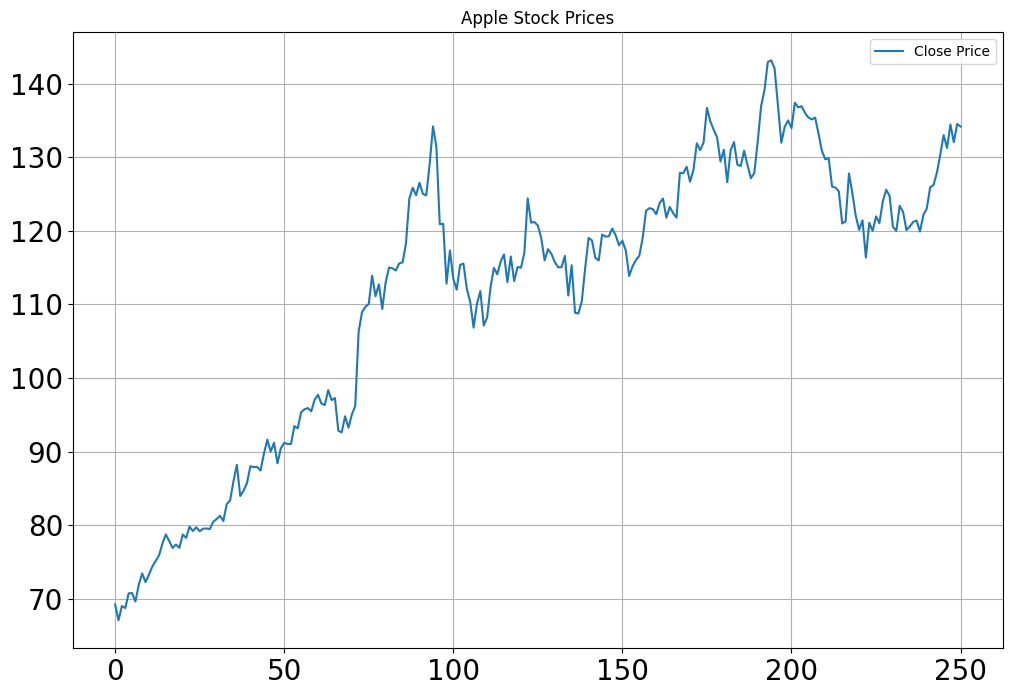

In [19]:
data = data[["Date", "Close"]]
print(data)
data["Date"] = pd.to_datetime(data.Date)
data["Close"].plot(figsize=(12, 8), title="Apple Stock Prices", fontsize=20, label="Close Price")
plt.legend()
plt.grid()
plt.show()

In [20]:

from autots import AutoTS
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

Using 1 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 20
Model Number: 2 with model AverageValueNaive in generation 0 of 20
Model Number: 3 with model AverageValueNaive in generation 0 of 20
Model Number: 4 with model AverageValueNaive in generation 0 of 20
Model Number: 5 with model DatepartRegression in generation 0 of 20
Model Number: 6 with model DatepartRegression in generation 0 of 20
Model Number: 7 with model DatepartRegression in generation 0 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 20
Epoch 1/50
6/6 [==============================] - 7s 7ms/step - loss: 0.3957
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3802
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3744
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3645
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3563
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3452
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3302
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3225
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3160
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 0.3030
Epoch 11/50
6/6 [==============================] - 0s 8ms/step - loss: 0.2930
Epoch 12/50
6/6 [==============================] - 0s 6ms/step - loss: 0.2870
Epoch

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 31 with model FBProphet in generation 0 of 20


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0eybhqat/y36ewwqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0eybhqat/fhc03evx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10483', 'data', 'file=/tmp/tmp0eybhqat/y36ewwqb.json', 'init=/tmp/tmp0eybhqat/fhc03evx.json', 'output', 'file=/tmp/tmp0eybhqat/prophet_modelrbzkxm9d/prophet_model-20240319080129.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:01:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 32 with model MultivariateRegression in generation 0 of 20
Model Number: 33 with model MultivariateRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 33 in generation 0: MultivariateRegression
Model Number: 34 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 34 in generation 0: DatepartRegression
Model Number: 35 with model SeasonalNaive in generation 0 of 20
Model Number: 36 with model DatepartRegression in generation 0 of 20
Model Number: 37 with model UnobservedComponents in generation 0 of 20
Model Number: 38 with model UnobservedComponents in generation 0 of 20
Model Number: 39 with model ETS in generation 0 of 20
Model Number: 40 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 40 in generation 0: VECM
Model Number: 41 wi

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 65 with model UnobservedComponents in generation 0 of 20
Model Number: 66 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 66 in generation 0: VAR
Model Number: 67 with model VECM in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VECM') in model 67 in generation 0: VECM
Model Number: 68 with model ARIMA in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 68 in generation 0: ARIMA
Model Number: 69 with model WindowRegression in generation 0 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 70 with model DatepartRegression in generation 0 of 20
Model Number: 71 with model UnivariateRegression in generation 0 of 20
Model Number: 72 with model MultivariateRegression in generation 0 of 20
Template Eval Error: XGBoostError('[08:01:35] /workspace/src/objective/regression_obj.cu:343: PoissonRegression: label must be nonnegative\nStack trace:\n  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xa8dc0a) [0x7c83a9cf5c0a]\n  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0xaa0797) [0x7c83a9d08797]\n  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x55f9ed) [0x7c83a97c79ed]\n  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4900d1) [0x7c83a96f80d1]\n  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4c0716) [0x7c83a9728716]\n  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4c5274) [0x7c83a972d274

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: LightGBMError('[poisson]: at least one target label is negative') in model 86 in generation 0: WindowRegression
Model Number: 87 with model ConstantNaive in generation 0 of 20
Model Number: 88 with model Theta in generation 0 of 20
Model Number: 89 with model DatepartRegression in generation 0 of 20
Model Number: 90 with model GLM in generation 0 of 20
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 90 in generation 0: GLM
Model Number: 91 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 91 in generation 0: VAR
Model Number: 92 with model DatepartRegression in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 92 in generation 0: DatepartRegression
Model Number: 93 with model SeasonalityMotif in generation 0 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 94 with model VECM in generation 0 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': True}, '1': {'method': 'butter', 'method_args': {'N': 5, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.011904761904761904}}, '2': {}, '3': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '4': {}}") in model 94 in generation 0: VECM
Model Number: 95 with model SeasonalNaive in generation 0 of 20
Model Number: 96 with model Theta in generation 0 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {}, '1': {}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '4': {}, '5': {'method': 'savgol_filter', 'method_args': {'window_length': 91, 'pol

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 104 with model UnobservedComponents in generation 0 of 20
Model Number: 105 with model SeasonalNaive in generation 0 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill_mean_biased {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 105 in generation 0: SeasonalNaive
Model Number: 106 with model ARDL in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 106 in generation 0: ARDL
Model Number: 107 with model LastValueNaive in generation 0 of 20
Model Number: 108 with model UnobservedComponents in generation 0 of 20
Template Eval Error: ValueError("regression_type='User' but no futur

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 119 with model GLS in generation 0 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params zero {'0': {}, '1': {'fixed': True, 'window': 10}, '2': {}, '3': {}, '4': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.08333333333333333}}}") in model 119 in generation 0: GLS
Model Number: 120 with model AverageValueNaive in generation 0 of 20
Model Number: 121 with model ARDL in generation 0 of 20
Model Number: 122 with model UnivariateMotif in generation 0 of 20
Model Number: 123 with model MultivariateMotif in generation 0 of 20
Model Number: 124 with model FBProphet in generation 0 of 20
back_forecast split 2 failed with LinAlgError('Array must not contain infs or NaNs')
back_forecast split 3 failed with LinAlgError('Array must not contain infs or NaNs')
back_forecast split 4 failed with LinAlgError('Array must not contain infs or NaNs')
back_forecast split 5 failed with LinAlgError('

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  A_tilde = u[:, :r].conj().T @ X2 @ v[:r, :].conj().T * np.reciprocal(s[:r])
/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning: invalid value encountered in multiply
  A_tilde = u[:, :r].conj().T @ X2 @ v[:r, :].conj().T * np.reciprocal(s[:r])
/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  A_tilde = u[:, :r].conj().T @ X2 @ v[:r, :].conj().T * np.reciprocal(s[:r])
/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning: invalid value encountered in multiply
  A_tilde = u[:, :r].conj().T @ X2 @ v[:r, :].conj().T * np.reciprocal(s[:r])
/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  A_tilde = u[:, :r].conj().T @ X2 @ v[:r, :].con

Template Eval Error: ValueError('Input X contains NaN.\nLocalOutlierFactor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 124 in generation 0: FBProphet
Model Number: 125 with model VAR in generation 0 of 20
Template Eval Error: ValueError('Only gave one variable to VAR') in model 125 in generation 0: VAR
Model Number: 126 with model UnivariateRegression in generation 0 of 20
Template Eval Error: Exception("Transformer ScipyFilter f

08:01:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {}, '1': {}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': True, 'anomaly_detector_params': {'method': 'IQR', 'method_params': {'iqr_threshold': 3.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False}, 'remove_excess_anomalies': True, 'impact': 'datepart_regression', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}}, '3': {'method': 'butter', 'method_args': {'N': 2, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.011904

/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'sigma': 0.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'recurring', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {}, '3': {'window_size': 90, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'average'}, '4': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '5': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 162 in generation 0: ARIMA
Model Number: 163 with model UnivariateMotif in generation 0 of 20
Model Number: 164 with model ARCH in generation 0 of 20
Template Eval Error: ImportError('`arch`

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 177 with model SeasonalityMotif in generation 0 of 20
Model Number: 178 with model LastValueNaive in generation 0 of 20
Model Number: 179 with model UnivariateMotif in generation 0 of 20
Model Number: 180 with model SeasonalityMotif in generation 0 of 20
Model Number: 181 with model UnobservedComponents in generation 0 of 20
New Generation: 1 of 20
Model Number: 182 with model WindowRegression in generation 1 of 20
Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 182 in generation 1: WindowRegression
Model Number: 183 with model UnobservedComponents in generation 1 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'method': 'butter', 'method_args': {'N': 6, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.08333333333333333}}, '2': {'whiten': False

08:01:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 205 with model ETS in generation 1 of 20
Model Number: 206 with model GLS in generation 1 of 20
Model Number: 207 with model MultivariateMotif in generation 1 of 20
Model Number: 208 with model ConstantNaive in generation 1 of 20
Model Number: 209 with model SectionalMotif in generation 1 of 20
Model Number: 210 with model Theta in generation 1 of 20
Model Number: 211 with model ARDL in generation 1 of 20
Model Number: 212 with model SeasonalityMotif in generation 1 of 20
Model Number: 213 with model UnivariateMotif in generation 1 of 20
Model Number: 214 with model GLM in generation 1 of 20
Model Number: 215 with model DatepartRegression in generation 1 of 20
Model Number: 216 with model UnivariateMotif in generation 1 of 20
Model Number: 217 with model LastValueNaive in generation 1 of 20
Model Number: 218 with model MetricMotif in generation 1 of 20
Model Number: 219 with model GLM in generation 1 of 20
Template Eval Error: ValueError('The first guess on the deviance f

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 221 with model UnobservedComponents in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 221 in generation 1: UnobservedComponents
Model Number: 222 with model UnivariateMotif in generation 1 of 20
Model Number: 223 with model SeasonalityMotif in generation 1 of 20
Model Number: 224 with model ETS in generation 1 of 20
Model Number: 225 with model FBProphet in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 225 in generation 1: FBProphet
Model Number: 226 with model AverageValueNaive in generation 1 of 20
Model Number: 227 with model LastValueNaive in generation 1 of 20
Model Number: 228 with model MetricMotif in generation 1 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 229 with model SeasonalityMotif in generation 1 of 20
Model Number: 230 with model GLS in generation 1 of 20
Model Number: 231 with model AverageValueNaive in generation 1 of 20
Model Number: 232 with model ETS in generation 1 of 20
Model Number: 233 with model SeasonalNaive in generation 1 of 20
Model Number: 234 with model MultivariateRegression in generation 1 of 20
Template Eval Error: ValueError('Some value(s) of y are negative which is not allowed for Poisson regression.') in model 234 in generation 1: MultivariateRegression
Model Number: 235 with model DatepartRegression in generation 1 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 235 in generation 1: DatepartRegression
Model Number: 236 with model ConstantNaive in generation 1 of 20
Model Number: 237 with model LastValueNaive in generation 1 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 238 with model MultivariateMotif in generation 1 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill {'0': {}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': {'model': 'Tweedie', 'phi': 1, 'window': 10, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}}, '3': {}}") in model 238 in generation 1: MultivariateMotif
Model Number: 239 with model GLS in generation 1 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 239 in generation 1: GLS
Model Number: 240 with model Theta in generation 1 of 2

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 247 with model ConstantNaive in generation 1 of 20
Model Number: 248 with model LastValueNaive in generation 1 of 20
Model Number: 249 with model SeasonalityMotif in generation 1 of 20
Model Number: 250 with model SeasonalNaive in generation 1 of 20
Model Number: 251 with model UnivariateRegression in generation 1 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {'lag_1': 364, 'method': 5}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, 'holiday_params': None}, '2': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}}") in model 251 in generation 1: UnivariateRe

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 291 with model DatepartRegression in generation 1 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 291 in generation 1: DatepartRegression
Model Number: 292 with model WindowRegression in generation 1 of 20
Model Number: 293 with model Theta in generation 1 of 20
Model Number: 294 with model AverageValueNaive in generation 1 of 20
Model Number: 295 with model GLS in generation 1 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {'method': 'nonparametric', 'method_params': {'p': None, 'z_init': 2.0, 'z_limit': 12, 'z_step': 0.5, 'inverse': False, 'max_contamination': 0.25, 'mean_weight': 25, 'sd_weight': 200, 'anomaly_count_weight': 1.0}, 'fillna': 'fake_date', 'transform_dict': None, 'isolated_only': False}, '1': {'det_order': 0, 'k_ar_diff': 1}, '2': {'window_size': 90, 'alpha': 4.0, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'last_value'}, '3'

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 315 with model SeasonalityMotif in generation 2 of 20
Model Number: 316 with model ARDL in generation 2 of 20
Model Number: 317 with model MultivariateMotif in generation 2 of 20
Model Number: 318 with model ARDL in generation 2 of 20
Model Number: 319 with model NVAR in generation 2 of 20
Model Number: 320 with model ARDL in generation 2 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '3': {'method': 'remove', 'std_threshold': 4.5, 'fillna': 'mean'}}") in model 320 in generation 2: ARDL
Model Number: 321 with model MultivariateMotif in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 322 with model Theta in generation 2 of 20
Model Number: 323 with model ARDL in generation 2 of 20
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 323 in generation 2: ARDL
Model Number: 324 with model DatepartRegression in generation 2 of 20
Model Number: 325 with model Theta in generation 2 of 20
Model Number: 326 with model AverageValueNaive in generation 2 of 20
Model Number: 327 with model SeasonalNaive in generation 2 of 20
Model Number: 328 with model LastValueNaive in generation 2 of 20
Model Number: 329 with model NVAR in generation 2 of 20
Model Number: 330 with model LastValueNaive in generation 2 of 20
Model Number: 331 with model SectionalMotif in generation 2 of 20
Model Number: 332 with model FBProphet in generation 2 of 20
Model Number: 333 with model AverageValueNaive in generation 2 of 20
Model Number: 334 with model SectionalMotif in generation 2 of 2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.98214e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 341 with model LastValueNaive in generation 2 of 20
Model Number: 342 with model MetricMotif in generation 2 of 20
Model Number: 343 with model SeasonalityMotif in generation 2 of 20
Model Number: 344 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 344 in generation 2: DatepartRegression
Model Number: 345 with model GLM in generation 2 of 20
Model Number: 346 with model SectionalMotif in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 347 with model SeasonalityMotif in generation 2 of 20
Model Number: 348 with model SeasonalNaive in generation 2 of 20
Model Number: 349 with model UnivariateMotif in generation 2 of 20
Model Number: 350 with model NVAR in generation 2 of 20
Model Number: 351 with model MultivariateMotif in generation 2 of 20
Model Number: 352 with model Theta in generation 2 of 20
Model Number: 353 with model SeasonalityMotif in generation 2 of 20
Model Number: 354 with model WindowRegression in generation 2 of 20
Model Number: 355 with model DatepartRegression in generation 2 of 20
Model Number: 356 with model Theta in generation 2 of 20
Model Number: 357 with model ARIMA in generation 2 of 20
Model Number: 358 with model SeasonalityMotif in generation 2 of 20
Model Number: 359 with model WindowRegression in generation 2 of 20
Model Number: 360 with model SeasonalityMotif in generation 2 of 20
Model Number: 361 with model LastValueNaive in generation 2 of 20
Model Number: 362 with model

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 373 with model NVAR in generation 2 of 20
Model Number: 374 with model UnobservedComponents in generation 2 of 20
Model Number: 375 with model WindowRegression in generation 2 of 20
Model Number: 376 with model WindowRegression in generation 2 of 20
Model Number: 377 with model AverageValueNaive in generation 2 of 20
Model Number: 378 with model ARDL in generation 2 of 20
Model Number: 379 with model SectionalMotif in generation 2 of 20
Model Number: 380 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 380 in generation 2: DatepartRegression
Model Number: 381 with model SeasonalNaive in generation 2 of 20
Model Number: 382 with model SeasonalityMotif in generation 2 of 20
Model Number: 383 with model FBProphet in generation 2 of 20
Model Number: 384 with model DatepartRegression in generation 2 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN fo

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 390 with model GLM in generation 2 of 20
Model Number: 391 with model ETS in generation 2 of 20
Model Number: 392 with model AverageValueNaive in generation 2 of 20
Model Number: 393 with model UnivariateMotif in generation 2 of 20
Model Number: 394 with model MultivariateMotif in generation 2 of 20
Model Number: 395 with model LastValueNaive in generation 2 of 20
Model Number: 396 with model FBProphet in generation 2 of 20
Model Number: 397 with model UnobservedComponents in generation 2 of 20
Model Number: 398 with model SectionalMotif in generation 2 of 20
Model Number: 399 with model ETS in generation 2 of 20
Model Number: 400 with model GLM in generation 2 of 20
Model Number: 401 with model SeasonalNaive in generation 2 of 20
Model Number: 402 with model DatepartRegression in generation 2 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean_24 {'0': {'part': 'trend', 'lamb': 1600}, '1': {}, '2': {'constant': 0, 'rei

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 413 with model ARDL in generation 2 of 20
Model Number: 414 with model UnobservedComponents in generation 2 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 414 in generation 2: UnobservedComponents
Model Number: 415 with model MultivariateMotif in generation 2 of 20
Model Number: 416 with model MultivariateMotif in generation 2 of 20
Model Number: 417 with model WindowRegression in generation 2 of 20
Model Number: 418 with model LastValueNaive in generation 2 of 20
Model Number: 419 with model MultivariateMotif in generation 2 of 20
Model Number: 420 with model UnivariateMotif in generation 2 of 20
Model Number: 421 with model UnivariateMotif in generation 2 of 20
Model Number: 422 with model SeasonalityMotif in generation 2 of 20
Model Number: 423 with model MultivariateMotif in generation 2 of 20
Model Number: 424 with model GLM in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 425 with model UnobservedComponents in generation 2 of 20
Model Number: 426 with model SectionalMotif in generation 2 of 20
Model Number: 427 with model Theta in generation 2 of 20
Model Number: 428 with model MultivariateMotif in generation 2 of 20
Model Number: 429 with model UnobservedComponents in generation 2 of 20
Model Number: 430 with model GLM in generation 2 of 20
Model Number: 431 with model Theta in generation 2 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


New Generation: 3 of 20
Model Number: 432 with model DatepartRegression in generation 3 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 432 in generation 3: DatepartRegression
Model Number: 433 with model NVAR in generation 3 of 20
Model Number: 434 with model AverageValueNaive in generation 3 of 20
Model Number: 435 with model LastValueNaive in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 436 with model MultivariateMotif in generation 3 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'low': 6, 'high': 40, 'K': 1, 'lanczos_factor': False, 'return_diff': True}, '1': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 436 in generation 3: MultivariateMotif
Model Number: 437 with model GLS in generation 3 of 20
Model Number: 438 with model SectionalMotif in generation 3 of 20
Model Number: 439 with model SeasonalityMotif in generation 3 of 20
Model Number: 440 with model AverageValueNaive in generation 3 of 20
Model Number: 441 with model UnobservedComponents in generation 3 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.59996e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 442 with model ARDL in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 442 in generation 3: ARDL
Model Number: 443 with model UnobservedComponents in generation 3 of 20
Model Number: 444 with model WindowRegression in generation 3 of 20
Template Eval Error: KeyError('model') in model 444 in generation 3: WindowRegression
Model Number: 445 with model MetricMotif in generation 3 of 20
Model Number: 446 with model DatepartRegression in generation 3 of 20
Model Number: 447 with model MultivariateRegression in generation 3 of 20
Model Number: 448 with model MultivariateMotif in generation 3 of 20
Model Number: 449 with model Theta in generation 3 of 20
Model Number: 450 with model SectionalMotif in generation 3 of 20
Model Number: 451 with model WindowRegression in generation 3 of 20
Template Eval Error: KeyError('model') in model 451 in generation 3: WindowRegression
Model Number: 452 with model WindowReg

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 464 with model ARDL in generation 3 of 20
Model Number: 465 with model Theta in generation 3 of 20
Model Number: 466 with model Theta in generation 3 of 20
Template Eval Error: Exception("Transformer Detrend failed on fit from params cubic {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {}, '2': {'model': 'Poisson', 'phi': 1, 'window': 90, 'transform_dict': None}}") in model 466 in generation 3: Theta
Model Number: 467 with model ARDL in generation 3 of 20
Model Number: 468 with model Theta in generation 3 of 20
Model Number: 469 with model ARDL in generation 3 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 469 in generation 3: ARDL
Model Number: 470 with model ETS in generation 3 of 20
Model Number: 471 with model MetricMotif in generation 3 of 20
Model Number: 472 with model ARIMA in generation 3 of 20
Model Number: 473 with model FBProphet in generation 3 of 20
Model Number: 474 with model Uni

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 495 with model UnivariateMotif in generation 3 of 20
Model Number: 496 with model ConstantNaive in generation 3 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 300, 'center': False}, 'fillna': 'linear', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}, 'isolated_only': False}, '2': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, 'holiday_params': None}, '3': {'regression_model': {'model':

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.59996e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 499 in generation 3: UnobservedComponents
Model Number: 500 with model GLM in generation 3 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.05}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, 'holiday_params': None}, '2': {}, '3': {}, '4': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.1, 'method': 'median', 'macro_micro': False}}") in model 500 in generation 3: GLM
Model Number: 501 with model AverageValueNaive in generation 3 of 20
Model Number: 502 with model UnivariateMotif in generation 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


Model Number: 506 with model SectionalMotif in generation 3 of 20
Model Number: 507 with model MetricMotif in generation 3 of 20
Model Number: 508 with model SeasonalityMotif in generation 3 of 20
Model Number: 509 with model UnobservedComponents in generation 3 of 20
Template Eval Error: LinAlgError('Singular matrix') in model 509 in generation 3: UnobservedComponents
Model Number: 510 with model SectionalMotif in generation 3 of 20
Model Number: 511 with model LastValueNaive in generation 3 of 20
Model Number: 512 with model GLM in generation 3 of 20
Model Number: 513 with model FBProphet in generation 3 of 20
Model Number: 514 with model DatepartRegression in generation 3 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'det_order': 0, 'k_ar_diff': 0}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {'rows': 3}, '4': {'discretization': 'upper', 'n_bins': 5

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 520 with model LastValueNaive in generation 3 of 20
Model Number: 521 with model ARDL in generation 3 of 20
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 521 in generation 3: ARDL
Model Number: 522 with model MultivariateRegression in generation 3 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'min_child_weight': 0.024, 'n_estimators': 162}, 'datepart_method': 'recurring'}, 'fillna': 'pchip'}, '2': {'lag_1': 28, 'method': 'Median'}, '3': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '4': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 534 with model SeasonalNaive in generation 3 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params median {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': True}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}, '5': {}}") in model 534 in generation 3: SeasonalNaive
Model Number: 535 with model UnobservedComponents in generation 3 of 20
Model Number: 536 with model UnivariateMotif in generation 3 of 20
Model Number: 537 with model UnobservedComponents in generation 3 of 20
Model Number: 538 with model UnivariateMotif in generation 3 of 20
Model Number: 539 with model SeasonalNaive in generation 3 of 20
Model Number: 540 with model ETS in generation 3 of 20
Model Number: 541 with model MultivariateMotif i

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 570 with model GLM in generation 4 of 20
Model Number: 571 with model ARDL in generation 4 of 20
Model Number: 572 with model LastValueNaive in generation 4 of 20
Model Number: 573 with model DatepartRegression in generation 4 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 573 in generation 4: DatepartRegression
Model Number: 574 with model MultivariateMotif in generation 4 of 20
Model Number: 575 with model LastValueNaive in generation 4 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 576 with model FBProphet in generation 4 of 20
Model Number: 577 with model SectionalMotif in generation 4 of 20
Model Number: 578 with model GLM in generation 4 of 20
Model Number: 579 with model LastValueNaive in generation 4 of 20
Model Number: 580 with model UnobservedComponents in generation 4 of 20
Model Number: 581 with model UnivariateMotif in generation 4 of 20
Model Number: 582 with model UnobservedComponents in generation 4 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 582 in generation 4: UnobservedComponents
Model Number: 583 with model ETS in generation 4 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean {'0': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.25}}, '1': {'model': 'Linear', 'phi': 1, 'window': None}}") in model 583 in generation 4: ETS
Model Number: 584 with model MultivariateM

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
08:03:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 608 with model NVAR in generation 4 of 20
Model Number: 609 with model ARIMA in generation 4 of 20
Model Number: 610 with model ARDL in generation 4 of 20
Model Number: 611 with model ConstantNaive in generation 4 of 20
Model Number: 612 with model MetricMotif in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}, '1': {'output_distribution': 'uniform', 'n_quantiles': 47}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'algorithm': 'deflation', 'fun': 'cube', 'max_iter': 100, 'whiten': False}}") in model 612 in generation 4: MetricMotif
Model Number: 613 with model UnivariateMotif in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {}, '1': {'det_order': -1, 'k_ar_diff': 2}, '2': {'mod

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 615 with model GLS in generation 4 of 20
Model Number: 616 with model SeasonalityMotif in generation 4 of 20
Model Number: 617 with model UnobservedComponents in generation 4 of 20
Model Number: 618 with model NVAR in generation 4 of 20
Model Number: 619 with model GLS in generation 4 of 20
Model Number: 620 with model AverageValueNaive in generation 4 of 20
Model Number: 621 with model DatepartRegression in generation 4 of 20
Model Number: 622 with model AverageValueNaive in generation 4 of 20
Model Number: 623 with model GLM in generation 4 of 20
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 623 in generation 4: GLM
Model Number: 624 with model AverageValueNaive in generation 4 of 20
Model Number: 625 with model SectionalMotif in generation 4 of 20
Model Number: 626 with model NVAR in generation 4 of 20
Model Number: 627 with model SectionalMotif in generation 4 of 20
Model Number: 628 with model UnobservedComponents in 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 632 with model Theta in generation 4 of 20
Model Number: 633 with model AverageValueNaive in generation 4 of 20
Model Number: 634 with model MultivariateRegression in generation 4 of 20
Model Number: 635 with model AverageValueNaive in generation 4 of 20
Model Number: 636 with model UnivariateMotif in generation 4 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill_mean_biased {'0': {'lag_1': 7, 'method': 'Median'}, '1': {'method': 'butter', 'method_args': {'N': 1, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.14285714285714285}}}") in model 636 in generation 4: UnivariateMotif
Model Number: 637 with model MetricMotif in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_v

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 653 with model DatepartRegression in generation 4 of 20
Model Number: 654 with model DatepartRegression in generation 4 of 20
Model Number: 655 with model NVAR in generation 4 of 20
Model Number: 656 with model NVAR in generation 4 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'det_order': 0, 'k_ar_diff': 1}, '1': {}, '2': {}}") in model 656 in generation 4: NVAR
Model Number: 657 with model SectionalMotif in generation 4 of 20
Model Number: 658 with model MultivariateMotif in generation 4 of 20
Model Number: 659 with model UnivariateMotif in generation 4 of 20
Model Number: 660 with model SeasonalityMotif in generation 4 of 20
Model Number: 661 with model WindowRegression in generation 4 of 20
Model Number: 662 with model Theta in generation 4 of 20
Model Number: 663 with model NVAR in generation 4 of 20
Model Number: 664 with model WindowRegression in generation 4 of 20
Model Number: 665 with model Seasonal

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 673 with model ARDL in generation 4 of 20
Model Number: 674 with model SeasonalNaive in generation 4 of 20
Model Number: 675 with model SeasonalNaive in generation 4 of 20
Model Number: 676 with model SeasonalNaive in generation 4 of 20
Model Number: 677 with model LastValueNaive in generation 4 of 20
Model Number: 678 with model UnobservedComponents in generation 4 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'rolling_window': 30, 'n_tails': 180, 'n_future': 0.05, 'method': 'median', 'macro_micro': True}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.7, 'first_value_only': True}, '2': {'lag_1': 7, 'method': 'Mean'}}") in model 678 in generation 4: UnobservedComponents
Model Number: 679 with model GLM in generation 4 of 20
Model Number: 680 with model SeasonalNaive in generation 4 of 20
Model Number: 681 with model SeasonalNaive in generation 4 of 20
New Generation: 5 of 20
Model Num

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.930e+00, tolerance: 2.114e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params ffill {'0': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'lag_1': 2, 'method': 'LastValue'}}") in model 689 in generation 5: GLM
Model Number: 690 with model MultivariateMotif in generation 5 of 20
Model Number: 691 with model AverageValueNaive in generation 5 of 20
Model Number: 692 with model FBProphet in generation 5 of 20


08:03:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 693 with model SeasonalityMotif in generation 5 of 20
Model Number: 694 with model UnobservedComponents in generation 5 of 20
Model Number: 695 with model UnobservedComponents in generation 5 of 20
Template Eval Error: LinAlgError('Singular matrix') in model 695 in generation 5: UnobservedComponents
Model Number: 696 with model GLM in generation 5 of 20
Model Number: 697 with model AverageValueNaive in generation 5 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 698 with model AverageValueNaive in generation 5 of 20
Model Number: 699 with model UnivariateMotif in generation 5 of 20
Model Number: 700 with model UnivariateMotif in generation 5 of 20
Model Number: 701 with model UnivariateMotif in generation 5 of 20
Model Number: 702 with model AverageValueNaive in generation 5 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.9, 'first_value_only': False}}") in model 702 in generation 5: AverageValueNaive
Model Number: 703 with model NVAR in generation 5 of 20
Model Number: 704 with model ARDL in generation 5 of 20
Model Number: 705 with model LastValueNaive in generation 5 of 20
Model Number: 706 with model NVAR in generation 5 of 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
08:03:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 729 with model UnobservedComponents in generation 5 of 20
Model Number: 730 with model ARDL in generation 5 of 20
Model Number: 731 with model DatepartRegression in generation 5 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 731 in generation 5: DatepartRegression
Model Number: 732 with model SeasonalityMotif in generation 5 of 20
Model Number: 733 with model MetricMotif in generation 5 of 20
Model Number: 734 with model AverageValueNaive in generation 5 of 20
Model Number: 735 with model GLS in generation 5 of 20
Model Number: 736 with model LastValueNaive in generation 5 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {}, '1': {'method': 'butter', 'method_args': {'N': 8, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.14285714285714285}}, '2': {'lag_1': 168, 'method': 'LastValue'}, '3': {'model': 'Gamma', 'phi': 1, 'window': None, 'transform_dict': 

08:04:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 759 with model FBProphet in generation 5 of 20
Model Number: 760 with model SectionalMotif in generation 5 of 20
Model Number: 761 with model MultivariateMotif in generation 5 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {}}") in model 761 in generation 5: MultivariateMotif
Model Number: 762 with model SeasonalityMotif in generation 5 of 20
Model Number: 763 with model SeasonalityMotif in generation 5 of 20
Model Number: 764 with model NVAR in generation 5 of 20
Model Number: 765 with model ETS in generation 5 of 20
Model Number: 766 with model NVAR in generation 5 of 20
Model Number: 767

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 772 with model UnobservedComponents in generation 5 of 20
Model Number: 773 with model LastValueNaive in generation 5 of 20
Model Number: 774 with model UnivariateMotif in generation 5 of 20
Model Number: 775 with model LastValueNaive in generation 5 of 20
Model Number: 776 with model SectionalMotif in generation 5 of 20
Model Number: 777 with model FBProphet in generation 5 of 20


08:04:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 778 with model UnobservedComponents in generation 5 of 20
Model Number: 779 with model MultivariateMotif in generation 5 of 20
Model Number: 780 with model UnivariateMotif in generation 5 of 20
Template Eval Error: Exception("Transformer StandardScaler failed on inverse from params ffill {'0': {'window': None}, '1': {}, '2': {'rolling_window': 90, 'n_tails': 0.1, 'n_future': 90, 'method': 'median', 'macro_micro': True}}") in model 780 in generation 5: UnivariateMotif
Model Number: 781 with model MultivariateMotif in generation 5 of 20
New Generation: 6 of 20
Model Number: 782 with model UnobservedComponents in generation 6 of 20
Model Number: 783 with model MultivariateMotif in generation 6 of 20
Model Number: 784 with model UnobservedComponents in generation 6 of 20
Model Number: 785 with model UnobservedComponents in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 785 in generation 6: UnobservedCompo

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 805 with model SeasonalNaive in generation 6 of 20
Model Number: 806 with model UnobservedComponents in generation 6 of 20
Model Number: 807 with model AverageValueNaive in generation 6 of 20
Model Number: 808 with model AverageValueNaive in generation 6 of 20
Model Number: 809 with model AverageValueNaive in generation 6 of 20
Model Number: 810 with model DatepartRegression in generation 6 of 20
Model Number: 811 with model SeasonalityMotif in generation 6 of 20
Model Number: 812 with model UnobservedComponents in generation 6 of 20
Model Number: 813 with model ARDL in generation 6 of 20
Model Number: 814 with model SeasonalityMotif in generation 6 of 20
Model Number: 815 with model Theta in generation 6 of 20
Model Number: 816 with model FBProphet in generation 6 of 20
Model Number: 817 with model MultivariateMotif in generation 6 of 20
Model Number: 818 with model SectionalMotif in generation 6 of 20
Model Number: 819 with model UnobservedComponents in generation 6 of 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 828 with model SeasonalNaive in generation 6 of 20
Model Number: 829 with model DatepartRegression in generation 6 of 20
Model Number: 830 with model UnivariateMotif in generation 6 of 20
Model Number: 831 with model NVAR in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}}") in model 831 in generation 6: NVAR
Model Number: 832 with model MetricMotif in generation 6 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 833 with model ConstantNaive in generation 6 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params mean {'0': {'method': 'butter', 'method_args': {'N': 4, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.25}}, '1': {}, '2': {'window_size': 90, 'alpha': 2.0, 'grouping_forward_limit': 3, 'max_level_shifts': 5, 'alignment': 'average'}}") in model 833 in generation 6: ConstantNaive
Model Number: 834 with model SeasonalNaive in generation 6 of 20
Model Number: 835 with model SeasonalNaive in generation 6 of 20
Model Number: 836 with model MultivariateMotif in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'method': 'IQR', 'method_params': {'iqr_threshol

08:04:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 840 with model SectionalMotif in generation 6 of 20
Model Number: 841 with model GLM in generation 6 of 20
Model Number: 842 with model UnivariateMotif in generation 6 of 20
Model Number: 843 with model MultivariateMotif in generation 6 of 20
Model Number: 844 with model UnivariateMotif in generation 6 of 20
Model Number: 845 with model MultivariateMotif in generation 6 of 20
Model Number: 846 with model DatepartRegression in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 846 in generation 6: DatepartRegression
Model Number: 847 with model NVAR in generation 6 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean_24 {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {'method': 'rolling_z

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 870 with model FBProphet in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 870 in generation 6: FBProphet
Model Number: 871 with model UnobservedComponents in generation 6 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 871 in generation 6: UnobservedComponents
Model Number: 872 with model GLM in generation 6 of 20
Model Number: 873 with model GLM in generation 6 of 20
Model Number: 874 with model NVAR in generation 6 of 20
Model Number: 875 with model MetricMotif in generation 6 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params pad {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'part': 'trend', 'lamb': 1600}, '2': {'discretization': 'lower', 'n_bins': 20}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 8, 'eta': 1.0,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+00, tolerance: 2.114e+00
  model = cd_fast.enet_coordinate_descent(


Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean {'0': {'method': 'butter', 'method_args': {'N': 8, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.14285714285714285}}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}}") in model 881 in generation 6: MultivariateMotif
New Generation: 7 of 20
Model Number: 882 with model MultivariateMotif in generation 7 of 20
Model Number: 883 with model SectionalMotif in generation 7 of 20
Model Number: 884 with model SeasonalityMotif in generation 7 of 20
Model Number: 885 with model MetricMotif in generation 7 of 20
Model Number: 886 with model DatepartRegression in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 886 in generation 7: DatepartRegression
Model Number: 887 with model SeasonalityMotif in generation 7 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 888 with model WindowRegression in generation 7 of 20
Model Number: 889 with model FBProphet in generation 7 of 20
Model Number: 890 with model GLS in generation 7 of 20
Model Number: 891 with model NVAR in generation 7 of 20
Model Number: 892 with model UnobservedComponents in generation 7 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 892 in generation 7: UnobservedComponents
Model Number: 893 with model SectionalMotif in generation 7 of 20
Model Number: 894 with model UnobservedComponents in generation 7 of 20
Model Number: 895 with model SectionalMotif in generation 7 of 20
Model Number: 896 with model LastValueNaive in generation 7 of 20
Model Number: 897 with model FBProphet in generation 7 of 20
Model Number: 898 with model MultivariateMotif in generation 7 of 20
Model Number: 899 with model AverageValueNaive in generation 7 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit fro

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 914 with model MetricMotif in generation 7 of 20
Model Number: 915 with model MultivariateMotif in generation 7 of 20
Model Number: 916 with model Theta in generation 7 of 20
Model Number: 917 with model LastValueNaive in generation 7 of 20
Model Number: 918 with model MultivariateMotif in generation 7 of 20
Model Number: 919 with model DatepartRegression in generation 7 of 20
Model Number: 920 with model MultivariateMotif in generation 7 of 20
Model Number: 921 with model MultivariateMotif in generation 7 of 20
Model Number: 922 with model SectionalMotif in generation 7 of 20
Model Number: 923 with model SectionalMotif in generation 7 of 20
Model Number: 924 with model MetricMotif in generation 7 of 20
Model Number: 925 with model SeasonalityMotif in generation 7 of 20
Model Number: 926 with model ARDL in generation 7 of 20
Model Number: 927 with model ARDL in generation 7 of 20
Model Number: 928 with model AverageValueNaive in generation 7 of 20
Model Number: 929 with m

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 946 with model NVAR in generation 7 of 20
Model Number: 947 with model UnivariateMotif in generation 7 of 20
Model Number: 948 with model UnivariateMotif in generation 7 of 20
Model Number: 949 with model SeasonalityMotif in generation 7 of 20
Model Number: 950 with model Theta in generation 7 of 20
Model Number: 951 with model FBProphet in generation 7 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'det_order': 1, 'k_ar_diff': 1}, '1': {'method': None, 'method_params': None, 'transform_dict': None, 'reverse_alignment': True, 'isolated_only': False, 'fillna': 3.0}, '2': {'window_size': 90, 'alpha': 4.0, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'average'}}") in model 951 in generation 7: FBProphet
Model Number: 952 with model FBProphet in generation 7 of 20
Model Number: 953 with model MetricMotif in generation 7 of 20
Model Number: 954 with model FBProphet in generation 7 of 20
Mod

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 959 with model UnobservedComponents in generation 7 of 20
Model Number: 960 with model GLS in generation 7 of 20
Model Number: 961 with model FBProphet in generation 7 of 20
Model Number: 962 with model SeasonalNaive in generation 7 of 20
Model Number: 963 with model UnobservedComponents in generation 7 of 20
Model Number: 964 with model MetricMotif in generation 7 of 20
Model Number: 965 with model ETS in generation 7 of 20
Model Number: 966 with model SectionalMotif in generation 7 of 20
Model Number: 967 with model FBProphet in generation 7 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '2': {}, '3': {'discretization': 'sklearn-kmeans', 'n_bins': 5}, '4': {'lag_1': 10, 'method': 'LastValue'}}") in model 967 in generation 7: FBProphet
Model Number: 968 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 975 with model LastValueNaive in generation 7 of 20
Model Number: 976 with model LastValueNaive in generation 7 of 20
Model Number: 977 with model UnivariateMotif in generation 7 of 20
Model Number: 978 with model LastValueNaive in generation 7 of 20
Model Number: 979 with model ARDL in generation 7 of 20
Model Number: 980 with model ARDL in generation 7 of 20
Model Number: 981 with model SeasonalityMotif in generation 7 of 20
New Generation: 8 of 20
Model Number: 982 with model MetricMotif in generation 8 of 20
Model Number: 983 with model AverageValueNaive in generation 8 of 20
Model Number: 984 with model UnivariateMotif in generation 8 of 20
Model Number: 985 with model UnobservedComponents in generation 8 of 20
Model Number: 986 with model UnobservedComponents in generation 8 of 20
Model Number: 987 with model ETS in generation 8 of 20
Model Number: 988 with model AverageValueNaive in generation 8 of 20
Model Number: 989 with model ARDL in generation 8 of 20
Model Nu

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 995 with model UnobservedComponents in generation 8 of 20
Model Number: 996 with model NVAR in generation 8 of 20
Model Number: 997 with model DatepartRegression in generation 8 of 20
Model Number: 998 with model AverageValueNaive in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 999 with model FBProphet in generation 8 of 20
Model Number: 1000 with model MultivariateMotif in generation 8 of 20
Model Number: 1001 with model SectionalMotif in generation 8 of 20
Model Number: 1002 with model NVAR in generation 8 of 20
Model Number: 1003 with model GLS in generation 8 of 20
Model Number: 1004 with model FBProphet in generation 8 of 20
Model Number: 1005 with model UnobservedComponents in generation 8 of 20
Model Number: 1006 with model MetricMotif in generation 8 of 20
Model Number: 1007 with model LastValueNaive in generation 8 of 20
Model Number: 1008 with model UnobservedComponents in generation 8 of 20
Model Number: 1009 with model DatepartRegression in generation 8 of 20
Model Number: 1010 with model NVAR in generation 8 of 20
Model Number: 1011 with model SectionalMotif in generation 8 of 20
Model Number: 1012 with model GLS in generation 8 of 20
Model Number: 1013 with model GLS in generation 8 of 20
Model Number: 1014 with model NVAR in gener

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1025 with model MetricMotif in generation 8 of 20
Model Number: 1026 with model UnivariateMotif in generation 8 of 20
Model Number: 1027 with model GLM in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+00, tolerance: 2.114e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1028 with model SeasonalNaive in generation 8 of 20
Model Number: 1029 with model Theta in generation 8 of 20
Model Number: 1030 with model GLM in generation 8 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1030 in generation 8: GLM
Model Number: 1031 with model ConstantNaive in generation 8 of 20
Model Number: 1032 with model ARDL in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1032 in generation 8: ARDL
Model Number: 1033 with model GLS in generation 8 of 20
Model Number: 1034 with model WindowRegression in generation 8 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1035 with model SectionalMotif in generation 8 of 20
Model Number: 1036 with model AverageValueNaive in generation 8 of 20
Model Number: 1037 with model MultivariateMotif in generation 8 of 20
Model Number: 1038 with model WindowRegression in generation 8 of 20
Model Number: 1039 with model UnobservedComponents in generation 8 of 20
Model Number: 1040 with model SeasonalityMotif in generation 8 of 20
Model Number: 1041 with model MetricMotif in generation 8 of 20
Model Number: 1042 with model SeasonalityMotif in generation 8 of 20
Model Number: 1043 with model NVAR in generation 8 of 20


08:04:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1044 with model NVAR in generation 8 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': {'method': 'butter', 'method_args': {'N': 8, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.5}}, '3': {}}") in model 1044 in generation 8: NVAR
Model Number: 1045 with model FBProphet in generation 8 of 20
Model Number: 1046 with model UnivariateRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1046 in generation 8: UnivariateRegression
Model Number: 1047 with model NVAR in generation 8 of 20
Model Number: 1048 with model WindowRegression in generation 8 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1048 in generation 8: WindowRegression
Model Number: 1049 with mode

/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1069 with model WindowRegression in generation 8 of 20
Model Number: 1070 with model GLS in generation 8 of 20
Model Number: 1071 with model SectionalMotif in generation 8 of 20
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 1071 in generation 8: SectionalMotif
Model Number: 1072 with model SeasonalNaive in generation 8 of 20
Model Number: 1073 with model DatepartRegression in generation 8 of 20
Model Number: 1074 with model FBProphet in generation 8 of 20


08:05:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1075 with model MultivariateMotif in generation 8 of 20
Model Number: 1076 with model UnivariateMotif in generation 8 of 20
Model Number: 1077 with model ARIMA in generation 8 of 20
Model Number: 1078 with model WindowRegression in generation 8 of 20
Model Number: 1079 with model UnobservedComponents in generation 8 of 20
Model Number: 1080 with model MultivariateMotif in generation 8 of 20
Model Number: 1081 with model FBProphet in generation 8 of 20
New Generation: 9 of 20
Model Number: 1082 with model ARDL in generation 9 of 20
Model Number: 1083 with model WindowRegression in generation 9 of 20
Model Number: 1084 with model GLS in generation 9 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.59996e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1085 with model NVAR in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}}") in model 1085 in generation 9: NVAR
Model Number: 1086 with model FBProphet in generation 9 of 20
Model Number: 1087 with model MetricMotif in generation 9 of 20
Model Number: 1088 with model SeasonalNaive in generation 9 of 20
Model Number: 1089 with model MetricMotif in generation 9 of 20
Model Number: 1090 with model DatepartRegression in generation 9 of 20
Model Number: 1091 with model MetricMotif in generation 9 of 20
Template Eval Error: TypeError("'NoneType' object is not subscriptable") in model 1091 in generation 9: MetricMotif
Model Number: 1092 with model ETS in generation 9 of 20
Model Number: 1093 with model Multivariate

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+00, tolerance: 2.114e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1098 with model MultivariateMotif in generation 9 of 20
Model Number: 1099 with model DatepartRegression in generation 9 of 20
Model Number: 1100 with model UnobservedComponents in generation 9 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1101 with model WindowRegression in generation 9 of 20
Model Number: 1102 with model SectionalMotif in generation 9 of 20
Model Number: 1103 with model UnivariateMotif in generation 9 of 20
Model Number: 1104 with model SeasonalityMotif in generation 9 of 20
Model Number: 1105 with model SeasonalNaive in generation 9 of 20
Model Number: 1106 with model NVAR in generation 9 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.59996e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1107 with model AverageValueNaive in generation 9 of 20
Model Number: 1108 with model SeasonalNaive in generation 9 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params mean {'0': {'constant': 1, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'n_estimators': 7, 'max_leaves': 4, 'min_child_weight': 2.5, 'learning_rate': 0.35, 'subsample': 0.95, 'colsample_bylevel': 0.56, 'colsample_bytree': 0.46, 'reg_alpha': 0.0016, 'reg_lambda': 5.3}, 'datepart_method': 'common_fourier'}, 'fillna': 'akima'}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {'window_size': 364, 'alpha': 2.0, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'rolling_diff_3nn'}, '3': {'method': 'remove', 'std_threshold': 4.5, 'fillna': 'mean'}, '4': {'cutoff': 0.01, 'reverse': False}}") in model 1108 in generation 9: SeasonalNaive
Model Number: 1109 with model MetricMotif in generation 9 of 20
Mo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1118 with model LastValueNaive in generation 9 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'method': 'butter', 'method_args': {'N': 6, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.08333333333333333}}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {}}") in model 1118 in generation 9: LastValueNaive
Model Number: 1119 with model ARDL in generation 9 of 20
Model Number: 1120 with model SeasonalityMotif in generation 9 of 20
Model Number: 1121 with model UnivariateMotif in generation 9 of 20
Model Number: 1122 with model MultivariateMotif in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params linear {'0': {'decimals': 0, 'on_transform': False, 'on_inverse': True}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '2': {}, '3': {'decimals': -1, 'on_tra

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1136 with model WindowRegression in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1136 in generation 9: WindowRegression
Model Number: 1137 with model GLM in generation 9 of 20
Model Number: 1138 with model DatepartRegression in generation 9 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1139 with model SectionalMotif in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'discretization': 'lower', 'n_bins': 10}, '1': {}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '3': {}}") in model 1139 in generation 9: SectionalMotif
Model Number: 1140 with model SectionalMotif in generation 9 of 20
Model Number: 1141 with model AverageValueNaive in generation 9 of 20
Model Number: 1142 with model DatepartRegression in generation 9 of 20
Model Number: 1143 with model FBProphet in generation 9 of 20
Model Number: 1144 with model NVAR in generation 9 of 20
Model Number: 1145 with model UnivariateMotif in generation 9 of 20
Model Number: 1146 with model SeasonalNaive in generation 9 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'lag_1': 95, 'method': 5}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Model Number: 1150 with model UnobservedComponents in generation 9 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1150 in generation 9: UnobservedComponents
Model Number: 1151 with model SectionalMotif in generation 9 of 20
Model Number: 1152 with model SeasonalityMotif in generation 9 of 20
Model Number: 1153 with model ConstantNaive in generation 9 of 20
Model Number: 1154 with model LastValueNaive in generation 9 of 20
Model Number: 1155 with model GLS in generation 9 of 20
Model Number: 1156 with model ARIMA in generation 9 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.588e+03, tolerance: 5.837e-01
  model = cd_fast.enet_coordinate_descent(


Model Number: 1157 with model SectionalMotif in generation 9 of 20
Model Number: 1158 with model NVAR in generation 9 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'det_order': 0, 'k_ar_diff': 0}}") in model 1158 in generation 9: NVAR
Model Number: 1159 with model ARDL in generation 9 of 20
Model Number: 1160 with model MultivariateMotif in generation 9 of 20
Model Number: 1161 with model SectionalMotif in generation 9 of 20
Model Number: 1162 with model ARDL in generation 9 of 20
Model Number: 1163 with model MetricMotif in generation 9 of 20
Model Number: 1164 with model ARDL in generation 9 of 20
Model Number: 1165 with model NVAR in generation 9 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse f

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1182 with model SeasonalityMotif in generation 10 of 20
Model Number: 1183 with model FBProphet in generation 10 of 20
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 0.2, 'first_value_only': False}, '1': {}, '2': {}, '3': {'regression_model': {'C': 1.0, 'tol': 0.0001, 'loss': 'epsilon_insensitive', 'max_iter': 500}, 'datepart_method': 'simple', 'polynomial_degree': 2, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used': False}}") in model 1183 in generation 10: FBProphet
Model Number: 1184 with model ConstantNaive in generation 10 of 20
Model Number: 1185 with model MultivariateMotif in generation 10 of 20
Model Number: 1186 with model DatepartRegression in generation 10 o

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1190 with model SectionalMotif in generation 10 of 20
Model Number: 1191 with model MetricMotif in generation 10 of 20
Model Number: 1192 with model FBProphet in generation 10 of 20
Model Number: 1193 with model WindowRegression in generation 10 of 20
Model Number: 1194 with model ARDL in generation 10 of 20
Model Number: 1195 with model MetricMotif in generation 10 of 20
Model Number: 1196 with model WindowRegression in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1196 in generation 10: WindowRegression
Model Number: 1197 with model MetricMotif in generation 10 of 20
Model Number: 1198 with model MultivariateMotif in generation 10 of 20
Model Number: 1199 with model ARDL in generation 10 of 20
Model Number: 1200 with model WindowRegression in generation 10 of 20
Model Number: 1201 with model FBProphet in generation 10 of 20
Model Number: 1202 with model AverageValueNaive in generation 10 of 20
Model

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1235 with model LastValueNaive in generation 10 of 20
Model Number: 1236 with model WindowRegression in generation 10 of 20
Model Number: 1237 with model SectionalMotif in generation 10 of 20
Model Number: 1238 with model MetricMotif in generation 10 of 20
Model Number: 1239 with model AverageValueNaive in generation 10 of 20
Model Number: 1240 with model UnivariateMotif in generation 10 of 20
Model Number: 1241 with model UnivariateMotif in generation 10 of 20
Model Number: 1242 with model AverageValueNaive in generation 10 of 20
Model Number: 1243 with model MultivariateMotif in generation 10 of 20
Model Number: 1244 with model FBProphet in generation 10 of 20


08:05:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1245 with model GLS in generation 10 of 20
Model Number: 1246 with model UnivariateMotif in generation 10 of 20
Model Number: 1247 with model MultivariateMotif in generation 10 of 20
Model Number: 1248 with model NVAR in generation 10 of 20
Model Number: 1249 with model UnivariateMotif in generation 10 of 20
Model Number: 1250 with model FBProphet in generation 10 of 20
Model Number: 1251 with model ARDL in generation 10 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1251 in generation 10: ARDL
Model Number: 1252 with model MetricMotif in generation 10 of 20
Model Number: 1253 with model MultivariateMotif in generation 10 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+00, tolerance: 2.114e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1254 with model WindowRegression in generation 10 of 20
Model Number: 1255 with model SeasonalityMotif in generation 10 of 20
Model Number: 1256 with model GLM in generation 10 of 20
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1256 in generation 10: GLM
New Generation: 11 of 20


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1257 with model MetricMotif in generation 11 of 20
Model Number: 1258 with model WindowRegression in generation 11 of 20
Model Number: 1259 with model SeasonalityMotif in generation 11 of 20
Model Number: 1260 with model ARDL in generation 11 of 20
Model Number: 1261 with model WindowRegression in generation 11 of 20
Model Number: 1262 with model FBProphet in generation 11 of 20
Model Number: 1263 with model MultivariateMotif in generation 11 of 20
Model Number: 1264 with model UnivariateMotif in generation 11 of 20
Model Number: 1265 with model MultivariateMotif in generation 11 of 20
Model Number: 1266 with model SeasonalityMotif in generation 11 of 20
Model Number: 1267 with model AverageValueNaive in generation 11 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 0, 'k_ar_diff': 1}, '1': {}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {}}") in model 1267 in generation 11: AverageValueNaive


08:05:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1286 with model MetricMotif in generation 11 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean {'0': {'method': 'butter', 'method_args': {'N': 8, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.03571428571428571}}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': {'model': 'Linear', 'phi': 1, 'window': None}}") in model 1286 in generation 11: MetricMotif
Model Number: 1287 with model SeasonalNaive in generation 11 of 20
Model Number: 1288 with model UnivariateMotif in generation 11 of 20
Model Number: 1289 with model UnivariateMotif in generation 11 of 20
Model Number: 1290 with model MetricMotif in generation 11 of 20
Model Number: 1291 with model MetricMotif in generation 11 of 20
Model Number: 1292 with model AverageValueNaive in generation 11 of 20
Model Number: 1293 with model SectionalMotif in generation 11 of 20
Model Number: 1294 with model FBProphet in generation 11 of 20
Template Ev

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 1302 with model SectionalMotif in generation 11 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.59996e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1303 with model DatepartRegression in generation 11 of 20
Model Number: 1304 with model AverageValueNaive in generation 11 of 20
Model Number: 1305 with model SeasonalityMotif in generation 11 of 20
Model Number: 1306 with model NVAR in generation 11 of 20
Model Number: 1307 with model WindowRegression in generation 11 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1307 in generation 11: WindowRegression
Model Number: 1308 with model WindowRegression in generation 11 of 20
Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 1308 in generation 11: WindowRegression
Model Number: 1309 with model ARDL in generation 11 of 20
Model Number: 1310 with model SectionalMotif in generation 11 of 20
Model Number: 1311 with model NVAR in generation 11 of 20
Model Number: 1312 with model SectionalMotif in generation 11 of 20
Model Number: 1313 with model ARDL in 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1317 with model MultivariateMotif in generation 11 of 20
Model Number: 1318 with model SectionalMotif in generation 11 of 20
Model Number: 1319 with model UnobservedComponents in generation 11 of 20
Model Number: 1320 with model UnivariateMotif in generation 11 of 20
Model Number: 1321 with model NVAR in generation 11 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 2, 'eta': 0.05, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 0.7, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 20}, 'datepart_method': 'common_fourier_rw'}, 'fillna': 'mean'}}") in model 1321 in generation 11: NVAR
Model Number: 1322 with model MultivariateMotif in genera

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 1332 with model NVAR in generation 12 of 20
Model Number: 1333 with model WindowRegression in generation 12 of 20
Model Number: 1334 with model UnobservedComponents in generation 12 of 20
Model Number: 1335 with model SeasonalNaive in generation 12 of 20
Model Number: 1336 with model FBProphet in generation 12 of 20
Model Number: 1337 with model MetricMotif in generation 12 of 20
Template Eval Error: IndexError('index 179 is out of bounds for axis 0 with size 95') in model 1337 in generation 12: MetricMotif
Model Number: 1338 with model NVAR in generation 12 of 20
Model Number: 1339 with model UnivariateMotif in generation 12 of 20
Model Number: 1340 with model WindowRegression in generation 12 of 20
Model Number: 1341 with model FBProphet in generation 12 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'fixed': True, 'window': 31}, '1': {'method': None, 'method_params': None, 'transform_dict': None, 'reverse_align

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1350 with model MetricMotif in generation 12 of 20
Model Number: 1351 with model FBProphet in generation 12 of 20
Model Number: 1352 with model SeasonalityMotif in generation 12 of 20
Model Number: 1353 with model SectionalMotif in generation 12 of 20
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1353 in generation 12: SectionalMotif
Model Number: 1354 with model SeasonalityMotif in generation 12 of 20
Model Number: 1355 with model DatepartRegression in generation 12 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean {'0': {'constant': 1, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'n_estimators': 7, 'max_leaves': 4, 'min_child_weight': 2.5, 'learning_rate': 0.35, 'subsample': 0.95, 'colsample_bylevel': 0.56, 'colsample_bytree': 0.46, 'reg_alpha': 0.0016, 'reg_lambda': 5.3}, 'datepart_method': 'simple_binarized'}, 'fillna': 'linear'}, '1': {'rows'

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1394 with model GLS in generation 12 of 20
Model Number: 1395 with model MetricMotif in generation 12 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1396 with model WindowRegression in generation 12 of 20
Model Number: 1397 with model AverageValueNaive in generation 12 of 20
Model Number: 1398 with model UnivariateMotif in generation 12 of 20
Model Number: 1399 with model UnivariateMotif in generation 12 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params zero {'0': {'span': 12}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '2': {'low': 6, 'high': 90, 'K': 1, 'lanczos_factor': False, 'return_diff': False}, '3': {}}") in model 1399 in generation 12: UnivariateMotif
Model Number: 1400 with model NVAR in generation 12 of 20
Model Number: 1401 with model ARDL in generation 12 of 20
Model Number: 1402 with model NVAR in generation 12 of 20
Model Number: 1403 with model NVAR in generation 12 of 20
Model Number: 1404 with model MetricMotif in generation 12 of 20
Model Number: 1405 with model WindowRegression in generation 12 of 20
Mode

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1419 with model ARDL in generation 13 of 20
Model Number: 1420 with model UnobservedComponents in generation 13 of 20
Model Number: 1421 with model MultivariateMotif in generation 13 of 20
Model Number: 1422 with model SectionalMotif in generation 13 of 20
Model Number: 1423 with model MetricMotif in generation 13 of 20
Model Number: 1424 with model ConstantNaive in generation 13 of 20
Model Number: 1425 with model ARDL in generation 13 of 20
Model Number: 1426 with model UnobservedComponents in generation 13 of 20
Model Number: 1427 with model SectionalMotif in generation 13 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params fake_date {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {}, '2': {'det_order': 0, 'k_ar_diff': 1}, '3': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': 'mean', 'transformations': {'0': 'SeasonalDifference', '1': 'LevelShiftTransformer'}, 'transformation_params': {'0'

08:06:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1439 with model MetricMotif in generation 13 of 20
Model Number: 1440 with model SeasonalityMotif in generation 13 of 20
Model Number: 1441 with model MultivariateMotif in generation 13 of 20
Model Number: 1442 with model ARDL in generation 13 of 20
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             seasonalitycommonfourier_0  seasonalitycommonfourier_1  \\\nDate                                                                 \n2020-07-13                   -0.982552                    0.930818   \n2020-07-14                   -0.979208                    0.917695   \n2020-07-15                   -0.975573                    0.903486   \n2020-07-16                   -0.971650                    0.888208   \n2020-07-17                   -0.967439                    0.871878   \n...                                ...                         ...   \n2021-03-29        

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1449 with model ARDL in generation 13 of 20
Model Number: 1450 with model SeasonalNaive in generation 13 of 20
Model Number: 1451 with model MetricMotif in generation 13 of 20
Model Number: 1452 with model ARDL in generation 13 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1452 in generation 13: ARDL
Model Number: 1453 with model NVAR in generation 13 of 20
Model Number: 1454 with model SeasonalityMotif in generation 13 of 20
Model Number: 1455 with model SeasonalityMotif in generation 13 of 20
Model Number: 1456 with model MultivariateMotif in generation 13 of 20
Model Number: 1457 with model WindowRegression in generation 13 of 20
Model Number: 1458 with model DatepartRegression in generation 13 of 20
Model Number: 1459 with model SectionalMotif in generation 13 of 20
Model Number: 1460 with model MetricMotif in generation 13 of 20
Model Number: 1461 with model UnivariateMotif in generation 13 of 20
Model Numb

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1495 with model SectionalMotif in generation 14 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {}, '2': {}, '3': {'method': 'butter', 'method_args': {'N': 7, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.016666666666666666}}, '4': {'model': 'Gamma', 'phi': 1, 'window': None, 'transform_dict': None}}") in model 1495 in generation 14: SectionalMotif
Model Number: 1496 with model MetricMotif in generation 14 of 20
Model Number: 1497 with model WindowRegression in generation 14 of 20
Model Number: 1498 with model UnivariateMotif in generation 14 of 20
Model Number: 1499 with model SeasonalityMotif in generation 14 of 20
Model Number: 1500 with model MultivariateMotif in generation 14 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean_24 {'0': {}, '1': {'method': 'butter', 'method_args': {'N': 8

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1531 with model UnivariateMotif in generation 14 of 20
Model Number: 1532 with model AverageValueNaive in generation 14 of 20
Model Number: 1533 with model GLS in generation 14 of 20
Model Number: 1534 with model MultivariateMotif in generation 14 of 20
Model Number: 1535 with model SectionalMotif in generation 14 of 20
Model Number: 1536 with model MetricMotif in generation 14 of 20
Model Number: 1537 with model UnivariateMotif in generation 14 of 20
Model Number: 1538 with model NVAR in generation 14 of 20
Model Number: 1539 with model MetricMotif in generation 14 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False}, '1': {'det_order': -1, 'k_ar_diff': 2}}") in model 1539 in generation 14: MetricMotif
Model Number: 1540 with model UnivariateMoti

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1545 with model FBProphet in generation 14 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1545 in generation 14: FBProphet
Model Number: 1546 with model UnivariateMotif in generation 14 of 20
Model Number: 1547 with model DatepartRegression in generation 14 of 20
Model Number: 1548 with model WindowRegression in generation 14 of 20
Model Number: 1549 with model UnobservedComponents in generation 14 of 20
Template Eval Error: LinAlgError('Singular matrix') in model 1549 in generation 14: UnobservedComponents
Model Number: 1550 with model SeasonalityMotif in generation 14 of 20
Template Eval Error: Exception("Transformer QuantileTransformer failed on fit from params ffill {'0': {'threshold': 0.7, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1557 with model SectionalMotif in generation 15 of 20
Model Number: 1558 with model NVAR in generation 15 of 20
Model Number: 1559 with model SeasonalityMotif in generation 15 of 20
Model Number: 1560 with model SeasonalityMotif in generation 15 of 20
Model Number: 1561 with model GLS in generation 15 of 20
Model Number: 1562 with model WindowRegression in generation 15 of 20
Model Number: 1563 with model ConstantNaive in generation 15 of 20
Model Number: 1564 with model MetricMotif in generation 15 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1565 with model WindowRegression in generation 15 of 20
Model Number: 1566 with model ConstantNaive in generation 15 of 20
Model Number: 1567 with model SeasonalityMotif in generation 15 of 20
Model Number: 1568 with model NVAR in generation 15 of 20
Model Number: 1569 with model DatepartRegression in generation 15 of 20
Model Number: 1570 with model NVAR in generation 15 of 20
Model Number: 1571 with model DatepartRegression in generation 15 of 20
Model Number: 1572 with model MetricMotif in generation 15 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'span': 2}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '4': {}}") in model 1572 in generation 15: MetricMotif
Model Number: 1573 with model MultivariateMotif in generation 15 of

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_stochastic_optimizers.py:276: RuntimeWarning: overflow encountered in square
  self.beta_2 * v + (1 - self.beta_2) * (grad**2)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_stochastic_optimizers.py:276: RuntimeWarning: overflow encountered in square
  self.beta_2 * v + (1 - self.beta_2) * (grad**2)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_stochastic_optimizers.py:276: RuntimeWarning: overflow encountered in square
  self.beta_2 * v + (1 - self.beta_2) * (grad**2)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_stochastic_optimizers.py:276: RuntimeWarning: overflow encountered in square
  self.beta_2 * v + (1 - self.beta_2) * (grad**2)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_stochastic_optimizers.py:276: RuntimeWarning: overflow encountered in square
  self.beta_2 * v + (1 - self.beta_2) * (grad**2)
/usr/local/lib/python3.10/dist-packages/sklea

Model Number: 1574 with model ARDL in generation 15 of 20
Model Number: 1575 with model ARDL in generation 15 of 20
Model Number: 1576 with model ARDL in generation 15 of 20
Model Number: 1577 with model AverageValueNaive in generation 15 of 20
Model Number: 1578 with model UnobservedComponents in generation 15 of 20
Model Number: 1579 with model SectionalMotif in generation 15 of 20
Model Number: 1580 with model FBProphet in generation 15 of 20
Model Number: 1581 with model SectionalMotif in generation 15 of 20
Model Number: 1582 with model SeasonalityMotif in generation 15 of 20
Model Number: 1583 with model GLS in generation 15 of 20
Model Number: 1584 with model GLS in generation 15 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1585 with model UnivariateMotif in generation 15 of 20
Model Number: 1586 with model LastValueNaive in generation 15 of 20
Template Eval Error: Exception("Transformer MinMaxScaler failed on fit from params rolling_mean {'0': {'rolling_window': 360, 'n_tails': 180, 'n_future': 0.2, 'method': 'median', 'macro_micro': True}, '1': {}, '2': {'model_name': 'ucm_deterministictrend_seasonal7', 'state_transition': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], 'process_noise': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 1, 1, 1, 1, 1]], 'observation_noise': 0.03, 'em_iter': None}, '3': {'rows'

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1591 with model NVAR in generation 15 of 20
Model Number: 1592 with model SectionalMotif in generation 15 of 20
Model Number: 1593 with model NVAR in generation 15 of 20
Model Number: 1594 with model MultivariateMotif in generation 15 of 20
Model Number: 1595 with model MetricMotif in generation 15 of 20
Model Number: 1596 with model DatepartRegression in generation 15 of 20
Model Number: 1597 with model NVAR in generation 15 of 20
Template Eval Error: Exception("Transformer RegressionFilter failed on fit from params fake_date {'0': {'lag_1': 24, 'method': 'LastValue'}, '1': {'sigma': 1.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transfor

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1599 with model NVAR in generation 15 of 20
Model Number: 1600 with model MultivariateMotif in generation 15 of 20
Model Number: 1601 with model SectionalMotif in generation 15 of 20
Model Number: 1602 with model LastValueNaive in generation 15 of 20
Model Number: 1603 with model SeasonalityMotif in generation 15 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1604 with model UnobservedComponents in generation 15 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1604 in generation 15: UnobservedComponents
Model Number: 1605 with model MetricMotif in generation 15 of 20
Model Number: 1606 with model ARDL in generation 15 of 20
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (830) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (187).') exog train              dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nDate                                                                 ...   \n2020-07-13  13.0  0.0  2459043.5  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   \n2020-07-14  14.0  0.0  2459044.5  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   \n2020-07-15  15.0  0.0  2459045.5  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   \n2

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1637 with model UnivariateMotif in generation 16 of 20
Model Number: 1638 with model LastValueNaive in generation 16 of 20
Model Number: 1639 with model UnobservedComponents in generation 16 of 20
Model Number: 1640 with model UnivariateMotif in generation 16 of 20
Model Number: 1641 with model MetricMotif in generation 16 of 20
Model Number: 1642 with model WindowRegression in generation 16 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+00, tolerance: 2.114e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1643 with model ARDL in generation 16 of 20
Model Number: 1644 with model UnivariateMotif in generation 16 of 20
Model Number: 1645 with model MetricMotif in generation 16 of 20
Model Number: 1646 with model MetricMotif in generation 16 of 20
Model Number: 1647 with model ARDL in generation 16 of 20
Model Number: 1648 with model SeasonalityMotif in generation 16 of 20
Model Number: 1649 with model UnobservedComponents in generation 16 of 20
Model Number: 1650 with model ARDL in generation 16 of 20
Model Number: 1651 with model MultivariateMotif in generation 16 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'det_order': 1, 'k_ar_diff': 1}, '1': {}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {}}") in model 1651 in generation 16: MultivariateMotif
Model Number: 1652 with model ARDL in generation 16 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 1671 with model NVAR in generation 16 of 20
Model Number: 1672 with model WindowRegression in generation 16 of 20
Model Number: 1673 with model DatepartRegression in generation 16 of 20
Model Number: 1674 with model MultivariateMotif in generation 16 of 20
Model Number: 1675 with model SeasonalityMotif in generation 16 of 20
Model Number: 1676 with model WindowRegression in generation 16 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1677 with model MetricMotif in generation 16 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'method': 'butter', 'method_args': {'N': 5, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.010416666666666666}}, '1': {'output_distribution': 'uniform', 'n_quantiles': 47}, '2': {'lag_1': 7, 'method': 'Median'}, '3': {'method': 'clip', 'std_threshold': 1, 'fillna': None}}") in model 1677 in generation 16: MetricMotif
Model Number: 1678 with model MetricMotif in generation 16 of 20
Model Number: 1679 with model GLM in generation 16 of 20
Model Number: 1680 with model WindowRegression in generation 16 of 20
Template Eval Error: KeyError('model') in model 1680 in generation 16: WindowRegression
Model Number: 1681 with model SeasonalityMotif in generation 16 of 20
Model Number: 1682 with model UnivariateMotif in generation 16 of 20
Model Number: 1683 with model UnobservedComponents in generation 16 of 20
Model Number:

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1694 with model SeasonalityMotif in generation 16 of 20
Model Number: 1695 with model SeasonalityMotif in generation 16 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'sigma': 0.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'Discretize'}, 'transformation_params': {'0': {'discretization': 'center', 'n_bins': 20}}}, 'holiday_countries_used': False}, 'holiday_params': None}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {}}") in model 1695 in generation 16: SeasonalityMotif
Model Number: 1696 with model ARDL in generation 16 of 20
Model Number: 1697 with model ARDL in generation 16 of 20
Model Number: 1698 wit

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+00, tolerance: 2.114e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1705 with model UnivariateMotif in generation 16 of 20


08:06:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1706 with model FBProphet in generation 16 of 20
New Generation: 17 of 20
Model Number: 1707 with model UnobservedComponents in generation 17 of 20
Model Number: 1708 with model MetricMotif in generation 17 of 20
Model Number: 1709 with model MetricMotif in generation 17 of 20
Model Number: 1710 with model SectionalMotif in generation 17 of 20
Model Number: 1711 with model UnivariateMotif in generation 17 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.973e+00, tolerance: 2.114e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1712 with model ARDL in generation 17 of 20
Model Number: 1713 with model SeasonalityMotif in generation 17 of 20
Model Number: 1714 with model SeasonalityMotif in generation 17 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params fake_date {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.003, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 0.9, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 7}, 'datepart_method': 'expanded_binarized'}, 'fillna': 'pchip'}}") in model 1714 in generation 17: SeasonalityMotif
Model Number: 1715 with model SeasonalityMotif in generation 17 of 20
Model Number: 1716 with model WindowRegression in generation 17 of 20
Model Number: 1717 with model NVAR in generation 17 of 20
Model Number: 1718 with model MultivariateMotif in generation 17 of 20
Model Number: 1719 with model MultivariateMotif in generation 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1742 with model SeasonalityMotif in generation 17 of 20
Model Number: 1743 with model UnobservedComponents in generation 17 of 20
Model Number: 1744 with model MultivariateMotif in generation 17 of 20
Model Number: 1745 with model MultivariateMotif in generation 17 of 20
Model Number: 1746 with model UnivariateMotif in generation 17 of 20
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill {'0': {}, '1': {'rows': 2, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '2': {'low': 6, 'high': 90, 'K': 1, 'lanczos_factor': False, 'return_diff': True}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '4': {'model_name': 'factor', 'state_transition': [[1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]], 'process_noise': [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1092: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1309: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1296: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Model Number: 1748 with model FBProphet in generation 17 of 20
Model Number: 1749 with model NVAR in generation 17 of 20
Model Number: 1750 with model GLS in generation 17 of 20
Model Number: 1751 with model UnivariateMotif in generation 17 of 20
Model Number: 1752 with model UnivariateMotif in generation 17 of 20
Model Number: 1753 with model GLS in generation 17 of 20
Model Number: 1754 with model UnivariateMotif in generation 17 of 20
Model Number: 1755 with model AverageValueNaive in generation 17 of 20
Model Number: 1756 with model SeasonalityMotif in generation 17 of 20
Model Number: 1757 with model SeasonalityMotif in generation 17 of 20
Model Number: 1758 with model NVAR in generation 17 of 20
Model Number: 1759 with model DatepartRegression in generation 17 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1759 in generation 17: DatepartRegression
Model Number: 1760 with model WindowRegression in generation 17 of 20
Model N

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+00, tolerance: 2.114e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1767 with model ARDL in generation 17 of 20
Model Number: 1768 with model SeasonalNaive in generation 17 of 20
Model Number: 1769 with model ARDL in generation 17 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1769 in generation 17: ARDL
Model Number: 1770 with model UnivariateMotif in generation 17 of 20
Model Number: 1771 with model WindowRegression in generation 17 of 20
Model Number: 1772 with model MetricMotif in generation 17 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params rolling_mean {'0': {'rows': 1}, '1': {'decimals': 2, 'on_transform': True, 'on_inverse': True}, '2': {'rows': 4, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '3': {}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}") in model 1772 in generation 17: MetricMotif
Model Number: 1773 with model MultivariateMotif in genera

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1816 with model UnobservedComponents in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1816 in generation 18: UnobservedComponents
Model Number: 1817 with model ARDL in generation 18 of 20
Model Number: 1818 with model GLM in generation 18 of 20
Template Eval Error: Exception("Transformer AlignLastValue failed on inverse from params pchip {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True}, '1': {'span': 4}, '2': {}, '3': {'output_distribution': 'uniform', 'n_quantiles': 47}}") in model 1818 in generation 18: GLM
Model Number: 1819 with model SectionalMotif in generation 18 of 20
Model Number: 1820 with model MetricMotif in generation 18 of 20
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params linear {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1847 with model ARDL in generation 18 of 20
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1847 in generation 18: ARDL
Model Number: 1848 with model SeasonalityMotif in generation 18 of 20
Model Number: 1849 with model AverageValueNaive in generation 18 of 20
Model Number: 1850 with model UnivariateMotif in generation 18 of 20
Model Number: 1851 with model MultivariateMotif in generation 18 of 20
Model Number: 1852 with model ARDL in generation 18 of 20
Model Number: 1853 with model ARDL in generation 18 of 20
Model Number: 1854 with model MetricMotif in generation 18 of 20
Model Number: 1855 with model SectionalMotif in generation 18 of 20
Model Number: 1856 with model FBProphet in generation 18 of 20
New Generation: 19 of 20
Model Number: 1857 with model SectionalMotif in generation 19 of 20
Model Number: 1858 with model DatepartRegression in generation 19 of 20
Model Number: 1859 with model ARDL in generation 19 of 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1862 with model FBProphet in generation 19 of 20


08:07:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1863 with model UnivariateMotif in generation 19 of 20
Model Number: 1864 with model NVAR in generation 19 of 20
Model Number: 1865 with model SectionalMotif in generation 19 of 20
Model Number: 1866 with model ARDL in generation 19 of 20
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'window_size': 30, 'alpha': 1.0, 'grouping_forward_limit': 2, 'max_level_shifts': 5, 'alignment': 'rolling_diff'}, '1': {'output_distribution': 'normal', 'n_quantiles': 63}, '2': {'det_order': 0, 'k_ar_diff': 0}}") in model 1866 in generation 19: ARDL
Model Number: 1867 with model AverageValueNaive in generation 19 of 20
Model Number: 1868 with model MetricMotif in generation 19 of 20
Model Number: 1869 with model GLS in generation 19 of 20
Model Number: 1870 with model NVAR in generation 19 of 20
Model Number: 1871 with model SeasonalityMotif in generation 19 of 20
Model Number: 1872 with model NVAR in generation 19 of 20
Model Number: 1873 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1885 with model MultivariateMotif in generation 19 of 20
Model Number: 1886 with model MultivariateMotif in generation 19 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill_mean_biased {'0': {}, '1': {'method': 'butter', 'method_args': {'N': 1, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.010752688172043012}}, '2': {}, '3': {}, '4': {}}") in model 1886 in generation 19: MultivariateMotif
Model Number: 1887 with model WindowRegression in generation 19 of 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1888 with model MetricMotif in generation 19 of 20
Model Number: 1889 with model UnobservedComponents in generation 19 of 20
Model Number: 1890 with model MetricMotif in generation 19 of 20
Model Number: 1891 with model MetricMotif in generation 19 of 20
Model Number: 1892 with model NVAR in generation 19 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '2': {'model': 'Linear', 'phi': 1, 'window': None}, '3': {'method': 'butter', 'method_args': {'N': 3, 'btype': 'lowpass', 'analog': False, 'output': 'sos', 'Wn': 0.08333333333333333}}, '4': {}}") in model 1892 in generation 19: NVAR
Model Number: 1893 with model WindowRegression in generation 19 of 20
Model Number: 1894 with model NVAR in generation 19 of 20
Model Number: 1895 with model AverageValueNaive in generation 19 of 20
Model Number: 1896 with model MetricMotif 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1899 with model UnobservedComponents in generation 19 of 20
Model Number: 1900 with model SeasonalNaive in generation 19 of 20
Model Number: 1901 with model MultivariateMotif in generation 19 of 20
Model Number: 1902 with model SectionalMotif in generation 19 of 20
Model Number: 1903 with model NVAR in generation 19 of 20
Model Number: 1904 with model UnobservedComponents in generation 19 of 20
Model Number: 1905 with model DatepartRegression in generation 19 of 20
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1905 in generation 19: DatepartRegression
Model Number: 1906 with model ARDL in generation 19 of 20
Model Number: 1907 with model GLS in generation 19 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params rolling_mean {'0': {'method': 'butter', 'method_args': {'N': 5, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.08333333333333333}

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1910 with model UnivariateMotif in generation 19 of 20
Model Number: 1911 with model SeasonalityMotif in generation 19 of 20
Model Number: 1912 with model UnivariateMotif in generation 19 of 20
Model Number: 1913 with model NVAR in generation 19 of 20
Model Number: 1914 with model FBProphet in generation 19 of 20
Model Number: 1915 with model SectionalMotif in generation 19 of 20
Model Number: 1916 with model MultivariateMotif in generation 19 of 20
Model Number: 1917 with model MetricMotif in generation 19 of 20
Model Number: 1918 with model SectionalMotif in generation 19 of 20
Model Number: 1919 with model UnobservedComponents in generation 19 of 20
Model Number: 1920 with model WindowRegression in generation 19 of 20
Model Number: 1921 with model UnobservedComponents in generation 19 of 20
Model Number: 1922 with model SeasonalityMotif in generation 19 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params fake_date {'0': {'output_distributio

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


Model Number: 1932 with model GLS in generation 20 of 20
Model Number: 1933 with model MultivariateMotif in generation 20 of 20
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'decimals': 0, 'on_transform': False, 'on_inverse': True}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '2': {}, '3': {}, '4': {}}") in model 1933 in generation 20: MultivariateMotif
Model Number: 1934 with model NVAR in generation 20 of 20
Template Eval Error: Exception("Transformer ScipyFilter failed on fit from params ffill {'0': {'method': 'butter', 'method_args': {'N': 8, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.03571428571428571}}, '1': {}, '2': {}, '3': {}, '4': {}}") in model 1934 in generation 20: NVAR
Model Number: 1935 with model WindowRegression in generation 20 of 20
Model Number: 1936 with model ARDL in generation 20 of 20
Model Number: 1937 with model WindowRegression in generation 20 of 20
Model 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 1960 with model GLS in generation 20 of 20
Model Number: 1961 with model ARDL in generation 20 of 20
Model Number: 1962 with model MetricMotif in generation 20 of 20
Model Number: 1963 with model MetricMotif in generation 20 of 20
Model Number: 1964 with model MetricMotif in generation 20 of 20
Model Number: 1965 with model SeasonalityMotif in generation 20 of 20
Model Number: 1966 with model MetricMotif in generation 20 of 20
Template Eval Error: ValueError('Shape of passed values is (10, 2), indices imply (10, 1)') in model 1966 in generation 20: MetricMotif
Model Number: 1967 with model SeasonalityMotif in generation 20 of 20
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params fake_date {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learning_rate': 0.022, 'max_bin': 256, 'max_depth': 14, 'max_leaves': 0, 'min_child_weight': 0.024, 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+00, tolerance: 2.114e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1982 with model Ensemble in generation 21 of Ensembles
Model Number: 1983 with model Ensemble in generation 21 of Ensembles
Model Number: 1984 with model Ensemble in generation 21 of Ensembles
Model Number: 1985 with model Ensemble in generation 21 of Ensembles
Model Number: 1986 with model Ensemble in generation 21 of Ensembles
Model Number: 1987 with model Ensemble in generation 21 of Ensembles
Model Number: 1988 with model Ensemble in generation 21 of Ensembles
Model Number: 1989 with model Ensemble in generation 21 of Ensembles
Validation Round: 1
Model Number: 1 of 279 with model NVAR for Validation 1
📈 1 - NVAR with avg smape 6.9: 
Model Number: 2 of 279 with model Ensemble for Validation 1
2 - Ensemble with avg smape 6.9: 
Model Number: 3 of 279 with model Ensemble for Validation 1
3 - Ensemble with avg smape 6.9: 
Model Number: 4 of 279 with model NVAR for Validation 1
4 - NVAR with avg smape 6.9: 
Model Number: 5 of 279 with model NVAR for Validation 1
5 - NVAR w

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e+01, tolerance: 2.111e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e+01, tolerance: 2.111e+00
  model = cd_fast.enet_coordinate_descent(


24 - MetricMotif with avg smape 9.08: 
Model Number: 25 of 279 with model MetricMotif for Validation 1
25 - MetricMotif with avg smape 9.69: 
Model Number: 26 of 279 with model UnivariateMotif for Validation 1
📈 26 - UnivariateMotif with avg smape 4.53: 
Model Number: 27 of 279 with model UnivariateMotif for Validation 1
27 - UnivariateMotif with avg smape 5.06: 
Model Number: 28 of 279 with model MetricMotif for Validation 1
📈 28 - MetricMotif with avg smape 2.5: 
Model Number: 29 of 279 with model SeasonalityMotif for Validation 1
29 - SeasonalityMotif with avg smape 10.03: 
Model Number: 30 of 279 with model UnivariateMotif for Validation 1
30 - UnivariateMotif with avg smape 3.07: 
Model Number: 31 of 279 with model MetricMotif for Validation 1
📈 31 - MetricMotif with avg smape 2.36: 
Model Number: 32 of 279 with model MetricMotif for Validation 1
32 - MetricMotif with avg smape 2.36: 
Model Number: 33 of 279 with model MetricMotif for Validation 1
33 - MetricMotif with avg smape 2

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


63 - ARDL with avg smape 6.98: 
Model Number: 64 of 279 with model ARDL for Validation 1
64 - ARDL with avg smape 6.93: 
Model Number: 65 of 279 with model MultivariateMotif for Validation 1
65 - MultivariateMotif with avg smape 10.01: 
Model Number: 66 of 279 with model UnivariateMotif for Validation 1
66 - UnivariateMotif with avg smape 6.81: 
Model Number: 67 of 279 with model WindowRegression for Validation 1
67 - WindowRegression with avg smape 7.69: 
Model Number: 68 of 279 with model WindowRegression for Validation 1
68 - WindowRegression with avg smape 7.69: 
Model Number: 69 of 279 with model MultivariateMotif for Validation 1
69 - MultivariateMotif with avg smape 9.2: 
Model Number: 70 of 279 with model MetricMotif for Validation 1
70 - MetricMotif with avg smape 9.01: 
Model Number: 71 of 279 with model ARDL for Validation 1
71 - ARDL with avg smape 6.79: 
Model Number: 72 of 279 with model MultivariateMotif for Validation 1
72 - MultivariateMotif with avg smape 7.37: 
Model

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


73 - MultivariateMotif with avg smape 8.91: 
Model Number: 74 of 279 with model WindowRegression for Validation 1
74 - WindowRegression with avg smape 6.12: 
Model Number: 75 of 279 with model WindowRegression for Validation 1
75 - WindowRegression with avg smape 6.12: 
Model Number: 76 of 279 with model WindowRegression for Validation 1
76 - WindowRegression with avg smape 6.12: 
Model Number: 77 of 279 with model SeasonalityMotif for Validation 1
77 - SeasonalityMotif with avg smape 8.96: 
Model Number: 78 of 279 with model ARDL for Validation 1
78 - ARDL with avg smape 6.25: 
Model Number: 79 of 279 with model ARDL for Validation 1
79 - ARDL with avg smape 6.8: 
Model Number: 80 of 279 with model ARDL for Validation 1
80 - ARDL with avg smape 6.8: 
Model Number: 81 of 279 with model ARDL for Validation 1
81 - ARDL with avg smape 6.8: 
Model Number: 82 of 279 with model ARDL for Validation 1
82 - ARDL with avg smape 6.8: 
Model Number: 83 of 279 with model SectionalMotif for Validati

08:07:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


135 - FBProphet with avg smape 8.12: 
Model Number: 136 of 279 with model FBProphet for Validation 1
136 - FBProphet with avg smape 8.31: 
Model Number: 137 of 279 with model AverageValueNaive for Validation 1
137 - AverageValueNaive with avg smape 9.93: 
Model Number: 138 of 279 with model AverageValueNaive for Validation 1
138 - AverageValueNaive with avg smape 9.93: 
Model Number: 139 of 279 with model FBProphet for Validation 1
139 - FBProphet with avg smape 7.92: 
Model Number: 140 of 279 with model FBProphet for Validation 1


08:07:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


140 - FBProphet with avg smape 8.23: 
Model Number: 141 of 279 with model AverageValueNaive for Validation 1
141 - AverageValueNaive with avg smape 9.53: 
Model Number: 142 of 279 with model AverageValueNaive for Validation 1
142 - AverageValueNaive with avg smape 9.57: 
Model Number: 143 of 279 with model FBProphet for Validation 1
143 - FBProphet with avg smape 7.39: 
Model Number: 144 of 279 with model LastValueNaive for Validation 1
144 - LastValueNaive with avg smape 13.57: 
Model Number: 145 of 279 with model AverageValueNaive for Validation 1
145 - AverageValueNaive with avg smape 10.14: 
Model Number: 146 of 279 with model DatepartRegression for Validation 1
146 - DatepartRegression with avg smape 12.03: 
Model Number: 147 of 279 with model FBProphet for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


147 - FBProphet with avg smape 7.39: 
Model Number: 148 of 279 with model AverageValueNaive for Validation 1
148 - AverageValueNaive with avg smape 9.99: 
Model Number: 149 of 279 with model AverageValueNaive for Validation 1
149 - AverageValueNaive with avg smape 8.96: 
Model Number: 150 of 279 with model FBProphet for Validation 1


08:07:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


150 - FBProphet with avg smape 7.46: 
Model Number: 151 of 279 with model FBProphet for Validation 1
151 - FBProphet with avg smape 8.21: 
Model Number: 152 of 279 with model AverageValueNaive for Validation 1


08:07:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


152 - AverageValueNaive with avg smape 9.97: 
Model Number: 153 of 279 with model FBProphet for Validation 1
153 - FBProphet with avg smape 8.91: 
Model Number: 154 of 279 with model FBProphet for Validation 1
154 - FBProphet with avg smape 8.44: 
Model Number: 155 of 279 with model AverageValueNaive for Validation 1
155 - AverageValueNaive with avg smape 10.17: 
Model Number: 156 of 279 with model AverageValueNaive for Validation 1
156 - AverageValueNaive with avg smape 10.06: 
Model Number: 157 of 279 with model AverageValueNaive for Validation 1
157 - AverageValueNaive with avg smape 10.06: 
Model Number: 158 of 279 with model FBProphet for Validation 1
158 - FBProphet with avg smape 7.32: 
Model Number: 159 of 279 with model SeasonalNaive for Validation 1
159 - SeasonalNaive with avg smape 9.23: 
Model Number: 160 of 279 with model FBProphet for Validation 1
160 - FBProphet with avg smape 8.81: 
Model Number: 161 of 279 with model AverageValueNaive for Validation 1
161 - AverageVal

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


164 - GLS with avg smape 9.94: 
Model Number: 165 of 279 with model DatepartRegression for Validation 1
165 - DatepartRegression with avg smape 11.55: 
Model Number: 166 of 279 with model GLM for Validation 1
166 - GLM with avg smape 10.1: 
Model Number: 167 of 279 with model GLS for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


167 - GLS with avg smape 9.9: 
Model Number: 168 of 279 with model GLS for Validation 1
168 - GLS with avg smape 9.9: 
Model Number: 169 of 279 with model GLM for Validation 1
169 - GLM with avg smape 10.07: 
Model Number: 170 of 279 with model DatepartRegression for Validation 1
170 - DatepartRegression with avg smape 9.21: 
Model Number: 171 of 279 with model GLM for Validation 1
171 - GLM with avg smape 10.17: 
Model Number: 172 of 279 with model DatepartRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


172 - DatepartRegression with avg smape 9.36: 
Model Number: 173 of 279 with model DatepartRegression for Validation 1
173 - DatepartRegression with avg smape 9.21: 
Model Number: 174 of 279 with model GLM for Validation 1
174 - GLM with avg smape 10.2: 
Model Number: 175 of 279 with model ConstantNaive for Validation 1
175 - ConstantNaive with avg smape 7.88: 
Model Number: 176 of 279 with model ConstantNaive for Validation 1
176 - ConstantNaive with avg smape 8.15: 
Model Number: 177 of 279 with model ConstantNaive for Validation 1
177 - ConstantNaive with avg smape 8.71: 
Model Number: 178 of 279 with model ETS for Validation 1
178 - ETS with avg smape 10.23: 
Model Number: 179 of 279 with model SeasonalNaive for Validation 1
179 - SeasonalNaive with avg smape 5.92: 
Model Number: 180 of 279 with model SeasonalNaive for Validation 1
180 - SeasonalNaive with avg smape 10.33: 
Model Number: 181 of 279 with model GLS for Validation 1
181 - GLS with avg smape 10.08: 
Model Number: 182 o

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


📈 208 - LastValueNaive with avg smape 0.87: 
Model Number: 209 of 279 with model SeasonalNaive for Validation 1
209 - SeasonalNaive with avg smape 5.47: 
Model Number: 210 of 279 with model ConstantNaive for Validation 1
210 - ConstantNaive with avg smape 10.27: 
Model Number: 211 of 279 with model SeasonalNaive for Validation 1
211 - SeasonalNaive with avg smape 5.51: 
Model Number: 212 of 279 with model SeasonalNaive for Validation 1
212 - SeasonalNaive with avg smape 1.0: 
Model Number: 213 of 279 with model LastValueNaive for Validation 1
213 - LastValueNaive with avg smape 4.6: 
Model Number: 214 of 279 with model SeasonalNaive for Validation 1
214 - SeasonalNaive with avg smape 4.81: 
Model Number: 215 of 279 with model ConstantNaive for Validation 1
215 - ConstantNaive with avg smape 6.15: 
Model Number: 216 of 279 with model ARIMA for Validation 1
216 - ARIMA with avg smape 5.01: 
Model Number: 217 of 279 with model ConstantNaive for Validation 1
217 - ConstantNaive with avg sm

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


225 - GLM with avg smape 10.02: 
Model Number: 226 of 279 with model LastValueNaive for Validation 1
226 - LastValueNaive with avg smape 1.46: 
Model Number: 227 of 279 with model LastValueNaive for Validation 1
227 - LastValueNaive with avg smape 1.68: 
Model Number: 228 of 279 with model LastValueNaive for Validation 1
228 - LastValueNaive with avg smape 1.04: 
Model Number: 229 of 279 with model LastValueNaive for Validation 1
229 - LastValueNaive with avg smape 2.69: 
Model Number: 230 of 279 with model LastValueNaive for Validation 1
230 - LastValueNaive with avg smape 6.71: 
Model Number: 231 of 279 with model LastValueNaive for Validation 1
231 - LastValueNaive with avg smape 1.9: 
Model Number: 232 of 279 with model Theta for Validation 1
232 - Theta with avg smape 1.05: 
Model Number: 233 of 279 with model Theta for Validation 1
233 - Theta with avg smape 1.01: 
Model Number: 234 of 279 with model Theta for Validation 1
📈 234 - Theta with avg smape 0.84: 
Model Number: 235 of 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


240 - Theta with avg smape 0.86: 
Model Number: 241 of 279 with model Theta for Validation 1
241 - Theta with avg smape 0.84: 
Model Number: 242 of 279 with model Theta for Validation 1
242 - Theta with avg smape 0.92: 
Model Number: 243 of 279 with model Theta for Validation 1
243 - Theta with avg smape 1.22: 
Model Number: 244 of 279 with model Theta for Validation 1
244 - Theta with avg smape 1.05: 
Model Number: 245 of 279 with model Theta for Validation 1
245 - Theta with avg smape 0.97: 
Model Number: 246 of 279 with model ARIMA for Validation 1
246 - ARIMA with avg smape 1.74: 
Model Number: 247 of 279 with model ARIMA for Validation 1
247 - ARIMA with avg smape 1.29: 
Model Number: 248 of 279 with model ARIMA for Validation 1
248 - ARIMA with avg smape 1.04: 
Model Number: 249 of 279 with model ARIMA for Validation 1
249 - ARIMA with avg smape 3.37: 
Model Number: 250 of 279 with model ETS for Validation 1
250 - ETS with avg smape 0.8: 
Model Number: 251 of 279 with model Univa

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e+01, tolerance: 2.103e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e+01, tolerance: 2.103e+00
  model = cd_fast.enet_coordinate_descent(


24 - MetricMotif with avg smape 12.25: 
Model Number: 25 of 279 with model MetricMotif for Validation 2
25 - MetricMotif with avg smape 10.65: 
Model Number: 26 of 279 with model UnivariateMotif for Validation 2
26 - UnivariateMotif with avg smape 11.62: 
Model Number: 27 of 279 with model UnivariateMotif for Validation 2
27 - UnivariateMotif with avg smape 10.76: 
Model Number: 28 of 279 with model MetricMotif for Validation 2
📈 28 - MetricMotif with avg smape 4.44: 
Model Number: 29 of 279 with model SeasonalityMotif for Validation 2
29 - SeasonalityMotif with avg smape 11.87: 
Model Number: 30 of 279 with model UnivariateMotif for Validation 2
30 - UnivariateMotif with avg smape 10.02: 
Model Number: 31 of 279 with model MetricMotif for Validation 2
📈 31 - MetricMotif with avg smape 4.42: 
Model Number: 32 of 279 with model MetricMotif for Validation 2
32 - MetricMotif with avg smape 4.42: 
Model Number: 33 of 279 with model MetricMotif for Validation 2
📈 33 - MetricMotif with avg s

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


64 - ARDL with avg smape 8.59: 
Model Number: 65 of 279 with model MultivariateMotif for Validation 2
65 - MultivariateMotif with avg smape 9.99: 
Model Number: 66 of 279 with model UnivariateMotif for Validation 2
66 - UnivariateMotif with avg smape 7.11: 
Model Number: 67 of 279 with model WindowRegression for Validation 2
67 - WindowRegression with avg smape 9.0: 
Model Number: 68 of 279 with model WindowRegression for Validation 2
68 - WindowRegression with avg smape 9.0: 
Model Number: 69 of 279 with model MultivariateMotif for Validation 2
69 - MultivariateMotif with avg smape 9.79: 
Model Number: 70 of 279 with model MetricMotif for Validation 2
70 - MetricMotif with avg smape 12.21: 
Model Number: 71 of 279 with model ARDL for Validation 2
71 - ARDL with avg smape 8.51: 
Model Number: 72 of 279 with model MultivariateMotif for Validation 2
72 - MultivariateMotif with avg smape 9.97: 
Model Number: 73 of 279 with model MultivariateMotif for Validation 2

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)



73 - MultivariateMotif with avg smape 10.15: 
Model Number: 74 of 279 with model WindowRegression for Validation 2
74 - WindowRegression with avg smape 5.87: 
Model Number: 75 of 279 with model WindowRegression for Validation 2
75 - WindowRegression with avg smape 5.87: 
Model Number: 76 of 279 with model WindowRegression for Validation 2
76 - WindowRegression with avg smape 5.87: 
Model Number: 77 of 279 with model SeasonalityMotif for Validation 2
77 - SeasonalityMotif with avg smape 10.56: 
Model Number: 78 of 279 with model ARDL for Validation 2
78 - ARDL with avg smape 8.5: 
Model Number: 79 of 279 with model ARDL for Validation 2
79 - ARDL with avg smape 8.86: 
Model Number: 80 of 279 with model ARDL for Validation 2
80 - ARDL with avg smape 8.86: 
Model Number: 81 of 279 with model ARDL for Validation 2
81 - ARDL with avg smape 8.86: 
Model Number: 82 of 279 with model ARDL for Validation 2
82 - ARDL with avg smape 8.86: 
Model Number: 83 of 279 with model SectionalMotif for Va

08:09:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


135 - FBProphet with avg smape 8.95: 
Model Number: 136 of 279 with model FBProphet for Validation 2
136 - FBProphet with avg smape 8.88: 
Model Number: 137 of 279 with model AverageValueNaive for Validation 2
137 - AverageValueNaive with avg smape 11.14: 
Model Number: 138 of 279 with model AverageValueNaive for Validation 2
138 - AverageValueNaive with avg smape 11.14: 
Model Number: 139 of 279 with model FBProphet for Validation 2
139 - FBProphet with avg smape 8.88: 
Model Number: 140 of 279 with model FBProphet for Validation 2


08:09:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


140 - FBProphet with avg smape 8.82: 
Model Number: 141 of 279 with model AverageValueNaive for Validation 2
141 - AverageValueNaive with avg smape 11.17: 
Model Number: 142 of 279 with model AverageValueNaive for Validation 2
142 - AverageValueNaive with avg smape 11.0: 
Model Number: 143 of 279 with model FBProphet for Validation 2
143 - FBProphet with avg smape 8.5: 
Model Number: 144 of 279 with model LastValueNaive for Validation 2
144 - LastValueNaive with avg smape 16.09: 
Model Number: 145 of 279 with model AverageValueNaive for Validation 2
145 - AverageValueNaive with avg smape 11.02: 
Model Number: 146 of 279 with model DatepartRegression for Validation 2
146 - DatepartRegression with avg smape 14.4: 
Model Number: 147 of 279 with model FBProphet for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


147 - FBProphet with avg smape 8.5: 
Model Number: 148 of 279 with model AverageValueNaive for Validation 2
148 - AverageValueNaive with avg smape 10.71: 
Model Number: 149 of 279 with model AverageValueNaive for Validation 2
149 - AverageValueNaive with avg smape 11.17: 
Model Number: 150 of 279 with model FBProphet for Validation 2


08:09:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


150 - FBProphet with avg smape 8.47: 
Model Number: 151 of 279 with model FBProphet for Validation 2
151 - FBProphet with avg smape 9.02: 
Model Number: 152 of 279 with model AverageValueNaive for Validation 2


08:09:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


152 - AverageValueNaive with avg smape 10.9: 
Model Number: 153 of 279 with model FBProphet for Validation 2
153 - FBProphet with avg smape 9.27: 
Model Number: 154 of 279 with model FBProphet for Validation 2
154 - FBProphet with avg smape 9.22: 
Model Number: 155 of 279 with model AverageValueNaive for Validation 2
155 - AverageValueNaive with avg smape 10.99: 
Model Number: 156 of 279 with model AverageValueNaive for Validation 2
156 - AverageValueNaive with avg smape 11.05: 
Model Number: 157 of 279 with model AverageValueNaive for Validation 2
157 - AverageValueNaive with avg smape 11.05: 
Model Number: 158 of 279 with model FBProphet for Validation 2
158 - FBProphet with avg smape 8.63: 
Model Number: 159 of 279 with model SeasonalNaive for Validation 2
159 - SeasonalNaive with avg smape 10.52: 
Model Number: 160 of 279 with model FBProphet for Validation 2
160 - FBProphet with avg smape 9.17: 
Model Number: 161 of 279 with model AverageValueNaive for Validation 2
161 - AverageVa

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


164 - GLS with avg smape 10.7: 
Model Number: 165 of 279 with model DatepartRegression for Validation 2
165 - DatepartRegression with avg smape 13.54: 
Model Number: 166 of 279 with model GLM for Validation 2
166 - GLM with avg smape 11.77: 
Model Number: 167 of 279 with model GLS for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


167 - GLS with avg smape 10.75: 
Model Number: 168 of 279 with model GLS for Validation 2
168 - GLS with avg smape 10.75: 
Model Number: 169 of 279 with model GLM for Validation 2
169 - GLM with avg smape 11.24: 
Model Number: 170 of 279 with model DatepartRegression for Validation 2
170 - DatepartRegression with avg smape 10.18: 
Model Number: 171 of 279 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


171 - GLM with avg smape 11.02: 
Model Number: 172 of 279 with model DatepartRegression for Validation 2
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params rolling_mean {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'rolling_window': 360, 'n_tails': 360, 'n_future': 0.1, 'method': 'mean', 'macro_micro': False}}") in model 172 in generation 0: DatepartRegression
Model Number: 173 of 279 with model DatepartRegression for Validation 2
173 - DatepartRegression with avg smape 10.97: 
Model Number: 174 of 279 with model GLM for Validation 2
174 - GLM with avg smape 11.08: 
Model Number: 175 of 279 with model ConstantNaive for Validation 2
175 - ConstantNaive with avg smape 8.25: 
Model Number: 176 of 279 with model ConstantNaive for Validation 2
176 - ConstantNaive with avg smape 8.27: 
Model Number: 177 of 279 with model ConstantNaive for Validation 2
177 - ConstantNaive with avg smape 8.97: 
Model Number: 178 of 279 with model ETS for 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


208 - LastValueNaive with avg smape 2.82: 
Model Number: 209 of 279 with model SeasonalNaive for Validation 2
209 - SeasonalNaive with avg smape 6.97: 
Model Number: 210 of 279 with model ConstantNaive for Validation 2
210 - ConstantNaive with avg smape 10.97: 
Model Number: 211 of 279 with model SeasonalNaive for Validation 2
211 - SeasonalNaive with avg smape 7.05: 
Model Number: 212 of 279 with model SeasonalNaive for Validation 2
212 - SeasonalNaive with avg smape 2.25: 
Model Number: 213 of 279 with model LastValueNaive for Validation 2
213 - LastValueNaive with avg smape 5.28: 
Model Number: 214 of 279 with model SeasonalNaive for Validation 2
214 - SeasonalNaive with avg smape 6.12: 
Model Number: 215 of 279 with model ConstantNaive for Validation 2
215 - ConstantNaive with avg smape 6.87: 
Model Number: 216 of 279 with model ARIMA for Validation 2
216 - ARIMA with avg smape 6.88: 
Model Number: 217 of 279 with model ConstantNaive for Validation 2
217 - ConstantNaive with avg sm

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


222 - LastValueNaive with avg smape 5.33: 
Model Number: 223 of 279 with model GLM for Validation 2
223 - GLM with avg smape 2.7: 
Model Number: 224 of 279 with model LastValueNaive for Validation 2
224 - LastValueNaive with avg smape 12.47: 
Model Number: 225 of 279 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


225 - GLM with avg smape 14.3: 
Model Number: 226 of 279 with model LastValueNaive for Validation 2
226 - LastValueNaive with avg smape 5.23: 
Model Number: 227 of 279 with model LastValueNaive for Validation 2
227 - LastValueNaive with avg smape 2.38: 
Model Number: 228 of 279 with model LastValueNaive for Validation 2
228 - LastValueNaive with avg smape 2.89: 
Model Number: 229 of 279 with model LastValueNaive for Validation 2
229 - LastValueNaive with avg smape 3.46: 
Model Number: 230 of 279 with model LastValueNaive for Validation 2
230 - LastValueNaive with avg smape 2.02: 
Model Number: 231 of 279 with model LastValueNaive for Validation 2
231 - LastValueNaive with avg smape 2.02: 
Model Number: 232 of 279 with model Theta for Validation 2
232 - Theta with avg smape 1.71: 
Model Number: 233 of 279 with model Theta for Validation 2
233 - Theta with avg smape 1.74: 
Model Number: 234 of 279 with model Theta for Validation 2
📈 234 - Theta with avg smape 1.59: 
Model Number: 235 of 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


📈 240 - Theta with avg smape 1.52: 
Model Number: 241 of 279 with model Theta for Validation 2
241 - Theta with avg smape 1.59: 
Model Number: 242 of 279 with model Theta for Validation 2
242 - Theta with avg smape 1.85: 
Model Number: 243 of 279 with model Theta for Validation 2
243 - Theta with avg smape 1.53: 
Model Number: 244 of 279 with model Theta for Validation 2
244 - Theta with avg smape 1.77: 
Model Number: 245 of 279 with model Theta for Validation 2
245 - Theta with avg smape 1.62: 
Model Number: 246 of 279 with model ARIMA for Validation 2
246 - ARIMA with avg smape 1.74: 
Model Number: 247 of 279 with model ARIMA for Validation 2
247 - ARIMA with avg smape 1.64: 
Model Number: 248 of 279 with model ARIMA for Validation 2
248 - ARIMA with avg smape 1.59: 
Model Number: 249 of 279 with model ARIMA for Validation 2
249 - ARIMA with avg smape 4.6: 
Model Number: 250 of 279 with model ETS for Validation 2
250 - ETS with avg smape 1.84: 
Model Number: 251 of 279 with model Uni

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.862e+01, tolerance: 2.084e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.862e+01, tolerance: 2.084e+00
  model = cd_fast.enet_coordinate_descent(


24 - MetricMotif with avg smape 9.41: 
Model Number: 25 of 279 with model MetricMotif for Validation 3
25 - MetricMotif with avg smape 13.66: 
Model Number: 26 of 279 with model UnivariateMotif for Validation 3
26 - UnivariateMotif with avg smape 10.1: 
Model Number: 27 of 279 with model UnivariateMotif for Validation 3
27 - UnivariateMotif with avg smape 9.82: 
Model Number: 28 of 279 with model MetricMotif for Validation 3
📈 28 - MetricMotif with avg smape 8.52: 
Model Number: 29 of 279 with model SeasonalityMotif for Validation 3
29 - SeasonalityMotif with avg smape 12.54: 
Model Number: 30 of 279 with model UnivariateMotif for Validation 3
30 - UnivariateMotif with avg smape 9.84: 
Model Number: 31 of 279 with model MetricMotif for Validation 3
31 - MetricMotif with avg smape 8.55: 
Model Number: 32 of 279 with model MetricMotif for Validation 3
32 - MetricMotif with avg smape 8.55: 
Model Number: 33 of 279 with model MetricMotif for Validation 3
33 - MetricMotif with avg smape 8.5

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


64 - ARDL with avg smape 8.94: 
Model Number: 65 of 279 with model MultivariateMotif for Validation 3
65 - MultivariateMotif with avg smape 8.49: 
Model Number: 66 of 279 with model UnivariateMotif for Validation 3
66 - UnivariateMotif with avg smape 4.83: 
Model Number: 67 of 279 with model WindowRegression for Validation 3
67 - WindowRegression with avg smape 9.29: 
Model Number: 68 of 279 with model WindowRegression for Validation 3
68 - WindowRegression with avg smape 9.29: 
Model Number: 69 of 279 with model MultivariateMotif for Validation 3
69 - MultivariateMotif with avg smape 8.98: 
Model Number: 70 of 279 with model MetricMotif for Validation 3
70 - MetricMotif with avg smape 10.11: 
Model Number: 71 of 279 with model ARDL for Validation 3
71 - ARDL with avg smape 8.91: 
Model Number: 72 of 279 with model MultivariateMotif for Validation 3
72 - MultivariateMotif with avg smape 7.89: 
Model Number: 73 of 279 with model MultivariateMotif for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


73 - MultivariateMotif with avg smape 8.24: 
Model Number: 74 of 279 with model WindowRegression for Validation 3
74 - WindowRegression with avg smape 14.69: 
Model Number: 75 of 279 with model WindowRegression for Validation 3
75 - WindowRegression with avg smape 14.69: 
Model Number: 76 of 279 with model WindowRegression for Validation 3
76 - WindowRegression with avg smape 14.69: 
Model Number: 77 of 279 with model SeasonalityMotif for Validation 3
77 - SeasonalityMotif with avg smape 9.41: 
Model Number: 78 of 279 with model ARDL for Validation 3
78 - ARDL with avg smape 9.02: 
Model Number: 79 of 279 with model ARDL for Validation 3
79 - ARDL with avg smape 9.12: 
Model Number: 80 of 279 with model ARDL for Validation 3
80 - ARDL with avg smape 9.12: 
Model Number: 81 of 279 with model ARDL for Validation 3
81 - ARDL with avg smape 9.12: 
Model Number: 82 of 279 with model ARDL for Validation 3
82 - ARDL with avg smape 9.12: 
Model Number: 83 of 279 with model SectionalMotif for V

08:11:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


136 - FBProphet with avg smape 10.9: 
Model Number: 137 of 279 with model AverageValueNaive for Validation 3
137 - AverageValueNaive with avg smape 10.1: 
Model Number: 138 of 279 with model AverageValueNaive for Validation 3
138 - AverageValueNaive with avg smape 10.1: 
Model Number: 139 of 279 with model FBProphet for Validation 3
139 - FBProphet with avg smape 8.07: 
Model Number: 140 of 279 with model FBProphet for Validation 3
140 - FBProphet with avg smape 4.38: 
Model Number: 141 of 279 with model AverageValueNaive for Validation 3
141 - AverageValueNaive with avg smape 10.46: 
Model Number: 142 of 279 with model AverageValueNaive for Validation 3
142 - AverageValueNaive with avg smape 10.36: 
Model Number: 143 of 279 with model FBProphet for Validation 3
143 - FBProphet with avg smape 10.08: 
Model Number: 144 of 279 with model LastValueNaive for Validation 3
144 - LastValueNaive with avg smape 9.18: 
Model Number: 145 of 279 with model AverageValueNaive for Validation 3
145 - 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


147 - FBProphet with avg smape 10.08: 
Model Number: 148 of 279 with model AverageValueNaive for Validation 3
148 - AverageValueNaive with avg smape 9.47: 
Model Number: 149 of 279 with model AverageValueNaive for Validation 3
149 - AverageValueNaive with avg smape 8.93: 
Model Number: 150 of 279 with model FBProphet for Validation 3


08:11:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


150 - FBProphet with avg smape 10.27: 
Model Number: 151 of 279 with model FBProphet for Validation 3
151 - FBProphet with avg smape 10.78: 
Model Number: 152 of 279 with model AverageValueNaive for Validation 3


08:11:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


152 - AverageValueNaive with avg smape 9.83: 
Model Number: 153 of 279 with model FBProphet for Validation 3
153 - FBProphet with avg smape 8.2: 
Model Number: 154 of 279 with model FBProphet for Validation 3
154 - FBProphet with avg smape 8.42: 
Model Number: 155 of 279 with model AverageValueNaive for Validation 3
155 - AverageValueNaive with avg smape 9.79: 
Model Number: 156 of 279 with model AverageValueNaive for Validation 3
156 - AverageValueNaive with avg smape 10.03: 
Model Number: 157 of 279 with model AverageValueNaive for Validation 3
157 - AverageValueNaive with avg smape 10.03: 
Model Number: 158 of 279 with model FBProphet for Validation 3
158 - FBProphet with avg smape 10.09: 
Model Number: 159 of 279 with model SeasonalNaive for Validation 3
159 - SeasonalNaive with avg smape 9.57: 
Model Number: 160 of 279 with model FBProphet for Validation 3
160 - FBProphet with avg smape 8.45: 
Model Number: 161 of 279 with model AverageValueNaive for Validation 3
161 - AverageValu

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


164 - GLS with avg smape 9.41: 
Model Number: 165 of 279 with model DatepartRegression for Validation 3
165 - DatepartRegression with avg smape 11.19: 
Model Number: 166 of 279 with model GLM for Validation 3
166 - GLM with avg smape 10.05: 
Model Number: 167 of 279 with model GLS for Validation 3
167 - GLS with avg smape 9.56: 
Model Number: 168 of 279 with model GLS for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


168 - GLS with avg smape 9.56: 
Model Number: 169 of 279 with model GLM for Validation 3
169 - GLM with avg smape 10.36: 
Model Number: 170 of 279 with model DatepartRegression for Validation 3
170 - DatepartRegression with avg smape 9.55: 
Model Number: 171 of 279 with model GLM for Validation 3
171 - GLM with avg smape 9.85: 
Model Number: 172 of 279 with model DatepartRegression for Validation 3
Template Eval Error: Exception("Transformer LocalLinearTrend failed on fit from params rolling_mean {'0': {'output_distribution': 'normal', 'n_quantiles': 20}, '1': {'rolling_window': 360, 'n_tails': 360, 'n_future': 0.1, 'method': 'mean', 'macro_micro': False}}") in model 172 in generation 0: DatepartRegression
Model Number: 173 of 279 with model DatepartRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


173 - DatepartRegression with avg smape 9.76: 
Model Number: 174 of 279 with model GLM for Validation 3
174 - GLM with avg smape 9.94: 
Model Number: 175 of 279 with model ConstantNaive for Validation 3
175 - ConstantNaive with avg smape 6.65: 
Model Number: 176 of 279 with model ConstantNaive for Validation 3
176 - ConstantNaive with avg smape 6.67: 
Model Number: 177 of 279 with model ConstantNaive for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


177 - ConstantNaive with avg smape 7.75: 
Model Number: 178 of 279 with model ETS for Validation 3
178 - ETS with avg smape 10.02: 
Model Number: 179 of 279 with model SeasonalNaive for Validation 3
179 - SeasonalNaive with avg smape 8.42: 
Model Number: 180 of 279 with model SeasonalNaive for Validation 3
180 - SeasonalNaive with avg smape 9.8: 
Model Number: 181 of 279 with model GLS for Validation 3
181 - GLS with avg smape 10.42: 
Model Number: 182 of 279 with model GLM for Validation 3
182 - GLM with avg smape 9.77: 
Model Number: 183 of 279 with model DatepartRegression for Validation 3
183 - DatepartRegression with avg smape 9.29: 
Model Number: 184 of 279 with model GLS for Validation 3
184 - GLS with avg smape 9.78: 
Model Number: 185 of 279 with model GLS for Validation 3
185 - GLS with avg smape 9.78: 
Model Number: 186 of 279 with model GLM for Validation 3
186 - GLM with avg smape 9.78: 
Model Number: 187 of 279 with model GLS for Validation 3
187 - GLS with avg smape 9.76

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


208 - LastValueNaive with avg smape 6.27: 
Model Number: 209 of 279 with model SeasonalNaive for Validation 3
209 - SeasonalNaive with avg smape 8.07: 
Model Number: 210 of 279 with model ConstantNaive for Validation 3
210 - ConstantNaive with avg smape 9.78: 
Model Number: 211 of 279 with model SeasonalNaive for Validation 3
211 - SeasonalNaive with avg smape 8.32: 
Model Number: 212 of 279 with model SeasonalNaive for Validation 3
212 - SeasonalNaive with avg smape 8.19: 
Model Number: 213 of 279 with model LastValueNaive for Validation 3
213 - LastValueNaive with avg smape 10.37: 
Model Number: 214 of 279 with model SeasonalNaive for Validation 3
214 - SeasonalNaive with avg smape 7.95: 
Model Number: 215 of 279 with model ConstantNaive for Validation 3
215 - ConstantNaive with avg smape 6.5: 
Model Number: 216 of 279 with model ARIMA for Validation 3
216 - ARIMA with avg smape 8.68: 
Model Number: 217 of 279 with model ConstantNaive for Validation 3
217 - ConstantNaive with avg sma

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


225 - GLM with avg smape 4.01: 
Model Number: 226 of 279 with model LastValueNaive for Validation 3
226 - LastValueNaive with avg smape 6.43: 
Model Number: 227 of 279 with model LastValueNaive for Validation 3
227 - LastValueNaive with avg smape 8.39: 
Model Number: 228 of 279 with model LastValueNaive for Validation 3
228 - LastValueNaive with avg smape 5.7: 
Model Number: 229 of 279 with model LastValueNaive for Validation 3
229 - LastValueNaive with avg smape 7.04: 
Model Number: 230 of 279 with model LastValueNaive for Validation 3
230 - LastValueNaive with avg smape 6.35: 
Model Number: 231 of 279 with model LastValueNaive for Validation 3
231 - LastValueNaive with avg smape 6.35: 
Model Number: 232 of 279 with model Theta for Validation 3
232 - Theta with avg smape 5.61: 
Model Number: 233 of 279 with model Theta for Validation 3
233 - Theta with avg smape 6.18: 
Model Number: 234 of 279 with model Theta for Validation 3
234 - Theta with avg smape 6.09: 
Model Number: 235 of 279

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


240 - Theta with avg smape 6.24: 
Model Number: 241 of 279 with model Theta for Validation 3
241 - Theta with avg smape 6.13: 
Model Number: 242 of 279 with model Theta for Validation 3
242 - Theta with avg smape 6.63: 
Model Number: 243 of 279 with model Theta for Validation 3
243 - Theta with avg smape 5.38: 
Model Number: 244 of 279 with model Theta for Validation 3
244 - Theta with avg smape 6.13: 
Model Number: 245 of 279 with model Theta for Validation 3
245 - Theta with avg smape 5.51: 
Model Number: 246 of 279 with model ARIMA for Validation 3
246 - ARIMA with avg smape 4.71: 
Model Number: 247 of 279 with model ARIMA for Validation 3
247 - ARIMA with avg smape 3.9: 
Model Number: 248 of 279 with model ARIMA for Validation 3
248 - ARIMA with avg smape 5.13: 
Model Number: 249 of 279 with model ARIMA for Validation 3
249 - ARIMA with avg smape 5.3: 
Model Number: 250 of 279 with model ETS for Validation 3
250 - ETS with avg smape 6.23: 
Model Number: 251 of 279 with model Univar

In the code section above, I have set the forecast_length parameter as 10, which means the period for which we want to predict the stock prices. So in the output, we will get the closing stock prices of Apple for the next 10 days.

In [21]:
prediction = model.predict()
forecast = prediction.forecast
print("Stock Price Prediction of Apple")
print(forecast)

Stock Price Prediction of Apple
                 Close
2021-04-19  135.282195
2021-04-20  135.999399
2021-04-21  136.500177
2021-04-22  137.985810
2021-04-23  139.592491
2021-04-26  143.096530
2021-04-27  143.160004
2021-04-28  143.160004
2021-04-29  143.160004
2021-04-30  143.160004
